In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [41]:
# Link to CSV file in Google Drive / Ссылка на CSV файл в Google Диске
google_drive_link = r"https://drive.google.com/file/d/1XzRO-80rtjaJ_ThWP8cVka4iMXYiQmXv/view?usp=sharing"
# Abrufen der Datei-ID über den Link / Извлекаем идентификатор файла из ссылки
file_id = google_drive_link.split("/")[5]
# Generieren eines direkten Links zum Herunterladen der Datei / Формируем прямую ссылку для загрузки файла
download_link = f"https://drive.google.com/uc?id={file_id}"
# Laden von Daten aus einer CSV-Datei in einen DataFrame / Загрузка данных из файла CSV в DataFrame
df = pd.read_csv(download_link)

In [42]:
print(df.head())

    Draw Date Winning Numbers  Mega Ball  Multiplier
0  09/25/2020  20 36 37 48 67         16         2.0
1  09/29/2020  14 39 43 44 67         19         3.0
2  10/02/2020  09 38 47 49 68         25         2.0
3  10/06/2020  15 16 18 39 59         17         3.0
4  10/09/2020  05 11 25 27 64         13         2.0


In [43]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Draw Date        2290 non-null   object 
 1   Winning Numbers  2290 non-null   object 
 2   Mega Ball        2290 non-null   int64  
 3   Multiplier       1387 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 71.7+ KB
None



Im Mega Millions Lotto ist der **"Mega Ball"** eine separate Zahl, die aus einem anderen Satz von Kugeln gezogen wird und Teil der Gewinnkombination ist. Um den Jackpot zu gewinnen, muss ein Spieler nicht nur die Hauptzahlen, sondern auch den Mega Ball richtig tippen. Der **"Multiplier"** (Multiplikator) ist eine optionale Funktion, die es ermöglicht, die Gewinne in den Nicht-Jackpot-Kategorien zu erhöhen. Wenn ein Spieler den Multiplikator wählt und gewinnt, wird sein Preis entsprechend dem Multiplikatorwert (z.B. 2- oder 3-fach) erhöht.


В лотерее Mega Millions, **"Mega Ball"** это отдельный номер, который вытягивается из отдельного набора шаров и является частью выигрышной комбинации. Чтобы выиграть джекпот, участник должен правильно угадать не только основные номера, но и Mega Ball. **"Multiplier"** (множитель) – это опциональная функция, которая позволяет увеличить выигрышные суммы в неджекпотных категориях. Если участник выбирает множитель и выигрывает, его приз увеличивается в соответствии с числом множителя (например, в 2 или 3 раза).

In [44]:
nan_counts = df.isnull().sum()
print("Number of NaN values in each column:")
print(nan_counts)

Number of NaN values in each column:
Draw Date            0
Winning Numbers      0
Mega Ball            0
Multiplier         903
dtype: int64


In [45]:
# Aufteilen einer Zeile in mehrere Spalten / Разделение строки на несколько столбцов
df[['Number1', 'Number2', 'Number3', 'Number4', 'Number5']] = df['Winning Numbers'].str.split(expand=True)
df = df.drop(columns=['Winning Numbers'])
# Entfernen des Multiplikators und der Gewinnzahlenspalten / Удаление столбцов Multiplier, Winning Numbers
df.drop('Multiplier', axis=1, inplace=True)
print(df)

       Draw Date  Mega Ball Number1 Number2 Number3 Number4 Number5
0     09/25/2020         16      20      36      37      48      67
1     09/29/2020         19      14      39      43      44      67
2     10/02/2020         25      09      38      47      49      68
3     10/06/2020         17      15      16      18      39      59
4     10/09/2020         13      05      11      25      27      64
...          ...        ...     ...     ...     ...     ...     ...
2285  04/19/2024          3      19      30      34      46      58
2286  04/23/2024         14      11      17      33      39      43
2287  04/26/2024          9      15      23      53      57      61
2288  04/30/2024          5      10      18      27      37      61
2289  05/03/2024         11      06      13      15      53      56

[2290 rows x 7 columns]


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Draw Date  2290 non-null   object
 1   Mega Ball  2290 non-null   int64 
 2   Number1    2290 non-null   object
 3   Number2    2290 non-null   object
 4   Number3    2290 non-null   object
 5   Number4    2290 non-null   object
 6   Number5    2290 non-null   object
dtypes: int64(1), object(6)
memory usage: 125.4+ KB


In [47]:
# Konvertieren Nummer1, Nummer2, Nummer3, Nummer4, Nummer5, Mega Ball in int8 und Draw Date in datetime64
# Конвертируем Number1, Number2, Number3, Number4, Number5, Mega Ball в int8 и Draw Date в datetime64
columns_to_convert = ['Number1', 'Number2', 'Number3', 'Number4', 'Number5', 'Mega Ball']
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, downcast='integer', errors='coerce')
df['Draw Date'] = pd.to_datetime(df['Draw Date'])

In [48]:
print(df)

      Draw Date  Mega Ball  Number1  Number2  Number3  Number4  Number5
0    2020-09-25         16       20       36       37       48       67
1    2020-09-29         19       14       39       43       44       67
2    2020-10-02         25        9       38       47       49       68
3    2020-10-06         17       15       16       18       39       59
4    2020-10-09         13        5       11       25       27       64
...         ...        ...      ...      ...      ...      ...      ...
2285 2024-04-19          3       19       30       34       46       58
2286 2024-04-23         14       11       17       33       39       43
2287 2024-04-26          9       15       23       53       57       61
2288 2024-04-30          5       10       18       27       37       61
2289 2024-05-03         11        6       13       15       53       56

[2290 rows x 7 columns]


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Draw Date  2290 non-null   datetime64[ns]
 1   Mega Ball  2290 non-null   int8          
 2   Number1    2290 non-null   int8          
 3   Number2    2290 non-null   int8          
 4   Number3    2290 non-null   int8          
 5   Number4    2290 non-null   int8          
 6   Number5    2290 non-null   int8          
dtypes: datetime64[ns](1), int8(6)
memory usage: 31.4 KB


In [50]:
numbers = df[['Number1', 'Number2', 'Number3', 'Number4', 'Number5']]
# Zählen der Häufigkeit jeder Zahl / Подсчет частоты каждого номера
frequency = numbers.apply(pd.value_counts).sum(axis=1).astype(int)
# Sortieren die Ergebnisse nach absteigender Häufigkeit / Сортировка результатов по убыванию частоты
frequency_sorted = frequency.sort_values(ascending=False)
print(frequency_sorted)

31    219
10    217
20    213
17    211
14    211
     ... 
73     31
74     30
75     25
71     22
72     20
Length: 75, dtype: int64


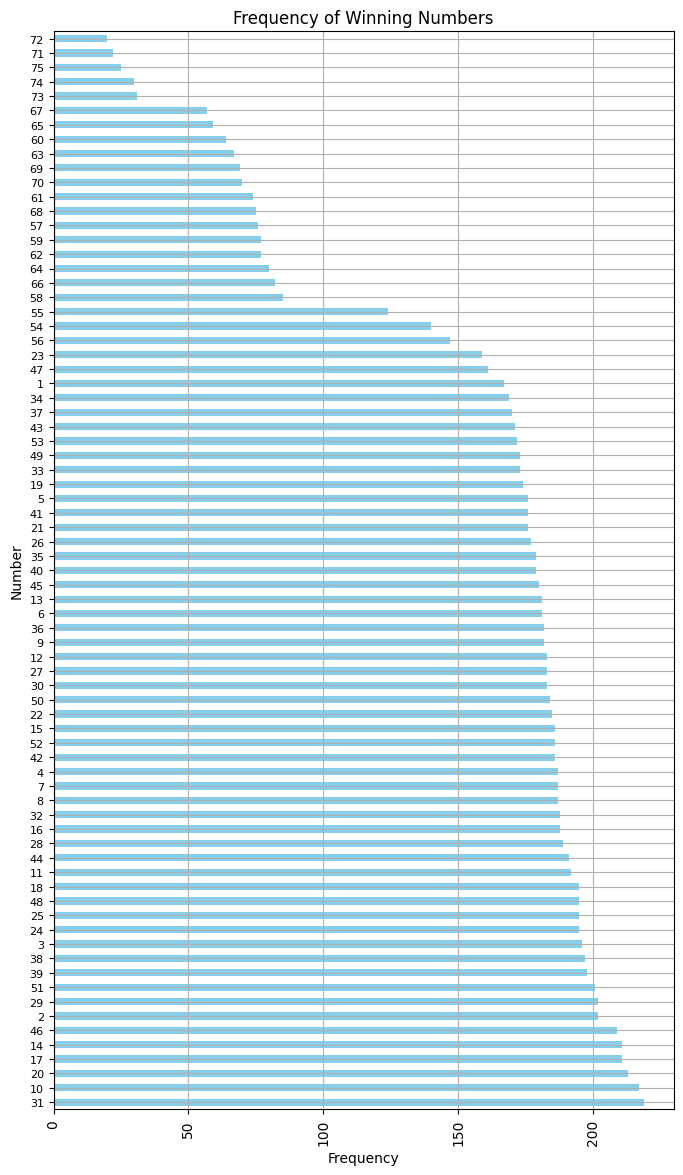

In [51]:
frequency_sorted.plot(kind='barh', figsize=(8, 14), color='skyblue')
plt.title('Frequency of Winning Numbers')
plt.xlabel('Frequency')
plt.ylabel('Number')
plt.xticks(rotation=90)
plt.yticks(fontsize=8)
plt.grid(True)
plt.show()

**Heatmap der Häufigkeit der Gewinnzahlen nach Jahr**

Тепловая карта частоты выпадения выигрышных номеров по годам

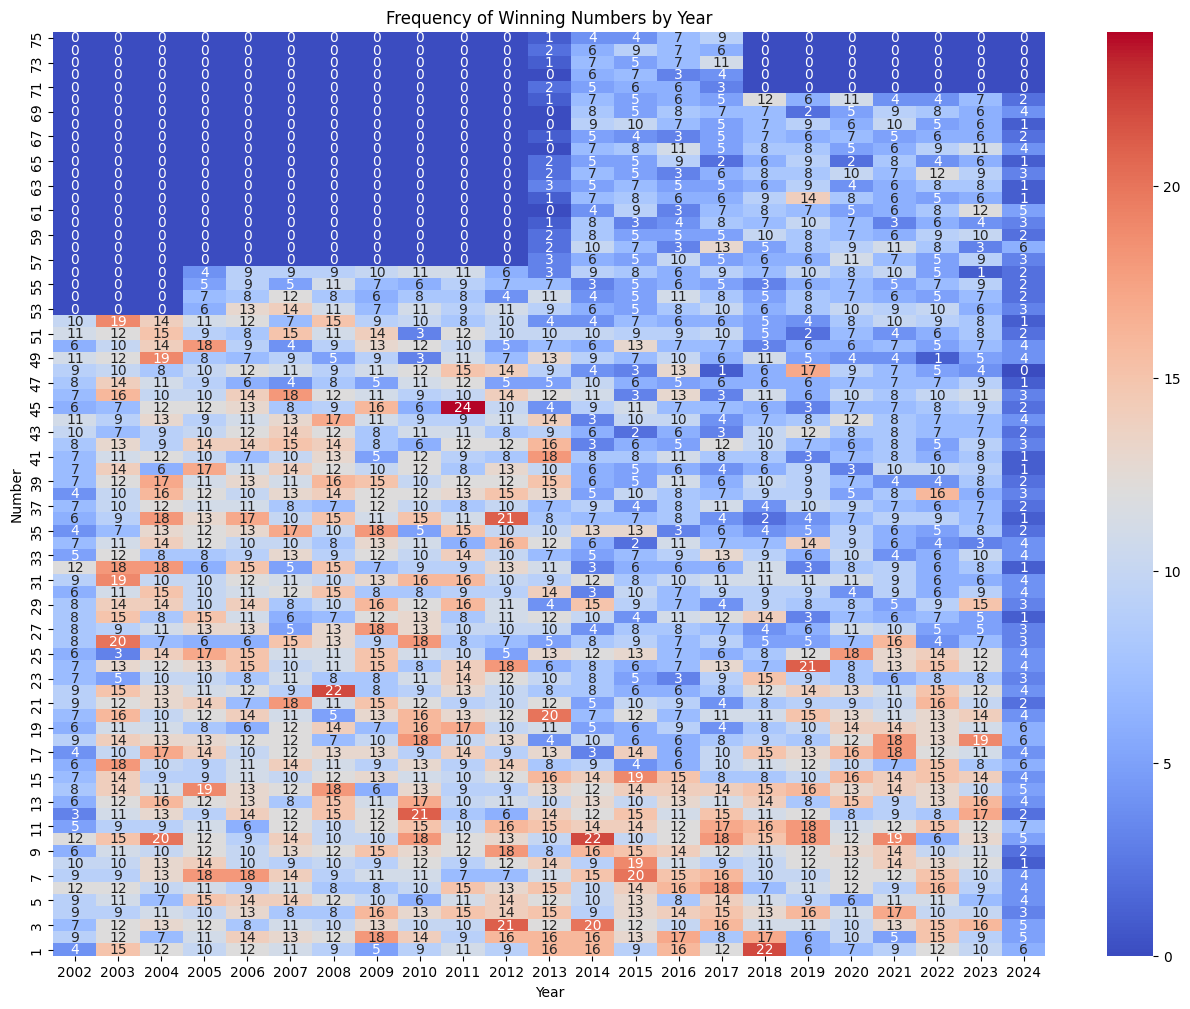

In [52]:
df = pd.DataFrame(df)
# Hinzufügen einer neuen Spalte mit dem Jahr der Auslosung / Добавление нового столбца с годом розыгрыша
df['Year'] = df['Draw Date'].dt.to_period('Y')
# Konvertieren Daten zur Analyse, mit Ausnahme Draw Date / Преобразование данных для анализа, исключая Draw Date
df_melted = df.drop(columns=['Draw Date']).melt(id_vars=['Year'], var_name='Number', value_name='Value')
# Konvertieren die Wertespalte Value das Zahlenformat in df_melted / Преобразование столбца Value в df_melted из строк в числовой формат
df_melted['Value'] = pd.to_numeric(df_melted['Value'], errors='coerce').fillna(0).astype(int)
# Zählen der Häufigkeit jeder Zahl pro Jahr / Подсчет частоты появления каждого номера по годам
frequency_df = df_melted.groupby(['Year', 'Value']).size().reset_index(name='Frequency')
# Pivotieren von Daten für eine Heatmap / Пивотирование данных для тепловой карты
heatmap_df = frequency_df.pivot(index='Year', columns='Value', values='Frequency').fillna(0).astype(int)
transposed_heatmap_df = heatmap_df.T
# Sortieren von DataFrame-Indizes in der gewünschten Reihenfolge / Сортировка индексов DataFrame в нужном порядке
transposed_heatmap_df = transposed_heatmap_df.sort_index(ascending=False)
# Visualisierung einer transponierten Heatmap / Визуализация транспонированной тепловой карты
plt.figure(figsize=(16, 12))
sns.heatmap(transposed_heatmap_df, cmap='coolwarm', annot=True)
plt.title('Frequency of Winning Numbers by Year')
plt.xlabel('Year')
plt.ylabel('Number')
plt.show()

Bei der Analyse von Lotteriedaten wurde ein Ansatz gewählt, der auf der Aufteilung des Originaldatensatzes in drei Zeitintervalle entsprechend den Änderungen in den Spielregeln beruhte, wodurch die Auswirkungen dieser Änderungen auf die Trends bei der Zahlenauswahl reduziert wurden. Zu den Zeitfenstern gehören:

- **2006-2012** - der Zeitraum, in dem Zahlen von 1 bis 56 beteiligt waren. Dieses Datensegment sorgt für Stabilität und ermöglicht die Analyse von Trends ohne den Einfluss von Änderungen in der Anzahl der Zahlen.
- **2014-2017** — wenn das Spiel Zahlen bis zu 75 umfasste, was es ermöglicht, das Verhalten von Spielern unter Bedingungen einer erhöhten Zahlenmenge zu untersuchen.
- **2018-2023** - die letzte aktuelle Periode mit Zahlen bis 70, die auch auf neue Trends und Änderungen in den Spielerstrategien hinweisen können. Die separate Betrachtung jedes Zeitraums ermöglicht eine genauere Einschätzung der Beliebtheit und der Veränderungen der Zahlenauswahl im Laufe der Zeit und minimiert Verzerrungen, die durch Änderungen der Spielregeln verursacht werden. Dieser Ansatz bietet die Grundlage für eine robustere Vorhersagemodellierung und strategische Planung im Lotteriekontext.


В анализе данных лотереи был принят подход, основанный на разделении исходного набора данных на три временных интервала в соответствии с изменениями в правилах игры, что позволяет сократить влияние этих изменений на тенденции выбора номеров. Временные интервалы включают:

* **2006-2012 гг.** — период, когда участвовали номера от 1 до 56. Этот сегмент данных обеспечивает стабильность и позволяет анализировать тенденции без влияния изменений в количество номеров.
* **2014-2017 гг.** — когда в игре участвовали номера до 75, что дает возможность исследовать поведение игроков в условиях увеличенного набора номеров.
* **2018-2023 гг.** — последний актуальный период с номерами до 70, что также может указывать на новые тенденции и изменения в стратегиях игроков.
Рассмотрение каждого периода отдельно позволяет точнее оценить популярность и изменения в выборе номеров с течением времени, минимизируя искажения, вызванные изменениями в правилах игры. Это подход создает основу для более надежного прогностического моделирования и стратегического планирования в контексте лотереи.

In [53]:
# Wir prüfen, ob die 75-Nummern-Ziehung das ganze Jahr 2017 über stattfindet / Проверяем весь ли 2017 год проводится розыгрыш из 75 номеров
df['Year'] = df['Draw Date'].dt.year
df2017 = df[df['Year'] == 2017]
df2017_71_75 = df2017[(df2017['Number1'] > 70) | (df2017['Number2'] > 70) | (df2017['Number3'] > 70) | (df2017['Number4'] > 70) | (df2017['Number5'] > 70)]
df2017_71_75.describe()

,Draw Date,Mega Ball,Number1,Number2,Number3,Number4,Number5,Year
count,30,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0
mean,2017-06-14 18:24:00,8.366667,10.200000,25.766667,41.600000,57.266667,73.433333,2017.0
min,2017-01-13 00:00:00,1.000000,1.000000,5.000000,14.000000,26.000000,71.000000,2017.0
25%,2017-04-20 06:00:00,6.000000,4.000000,14.500000,25.500000,51.250000,73.000000,2017.0
50%,2017-07-07 12:00:00,8.500000,7.500000,21.500000,46.000000,61.000000,73.000000,2017.0
75%,2017-08-13 06:00:00,11.000000,11.750000,38.000000,56.500000,66.750000,75.000000,2017.0
max,2017-10-20 00:00:00,15.000000,32.000000,56.000000,63.000000,74.000000,75.000000,2017.0
std,NaN,3.837055,8.159615,14.578405,16.132212,13.229886,1.330889,0.0


In [54]:
# Definieren von Grenzen zum Teilen des ursprünglichen Dataframe / Определение границ для разделения исходного датафрейма
years1 = range(2006, 2013)
years3 = range(2018, 2024)

# Erstellen separater DataFrames für jedes Zeitintervall / Создание отдельных DataFrame для каждого временного интервала
df56n = df[df['Year'].isin(years1)]
df70n = df[df['Year'].isin(years3)]

# Filterung der Daten von 2014 bis Oktober 2017 zur Erstellung eines Dataframe für diesen Zeitraum / Фильтрация данных с 2014 по октябрь 2017 создания датафрейма для данного периода
start_date = '2014-01-01'
end_date = '2017-10-20'
df75n = df[(df['Draw Date'] >= start_date) & (df['Draw Date'] <= end_date)]
print(df75n.head())
print(df75n.describe())

     Draw Date  Mega Ball  Number1  Number2  Number3  Number4  Number5  Year
366 2017-10-20          9        6       23       63       66       73  2017
367 2017-10-17         11       31       45       49       56       70  2017
368 2017-10-13         12        2        7       18       26       31  2017
369 2017-10-10          2        7       16       24       61       62  2017
370 2017-10-06         12       21       33       36       45       56  2017
                           Draw Date   Mega Ball     Number1     Number2  \
count                            397  397.000000  397.000000  397.000000   
mean   2015-11-27 05:59:05.591939584    8.103275   12.246851   24.901763   
min              2014-01-03 00:00:00    1.000000    1.000000    3.000000   
25%              2014-12-16 00:00:00    4.000000    5.000000   15.000000   
50%              2015-11-27 00:00:00    8.000000   10.000000   24.000000   
75%              2016-11-08 00:00:00   12.000000   18.000000   33.000000   
max   

In [55]:
df56n.head(20)

,Draw Date,Mega Ball,Number1,Number2,Number3,Number4,Number5,Year
867,2012-12-28,32,10,13,32,40,41,2012
868,2012-12-25,36,2,3,18,34,48,2012
869,2012-12-21,19,3,18,32,41,56,2012
870,2012-12-18,16,1,6,7,18,29,2012
871,2012-12-14,41,11,28,33,41,43,2012
872,2012-12-11,13,39,44,51,52,54,2012
873,2012-12-07,4,7,43,44,51,56,2012
874,2012-12-04,44,3,19,24,32,43,2012
875,2012-11-30,46,11,22,24,28,31,2012
876,2012-11-27,24,5,12,26,42,49,2012


In [56]:
df56n.describe()

,Draw Date,Mega Ball,Number1,Number2,Number3,Number4,Number5,Year
count,728,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000
mean,2009-07-02 00:27:41.538461440,23.570055,9.354396,18.802198,28.581044,37.991758,47.111264,2009.002747
min,2006-01-03 00:00:00,1.000000,1.000000,2.000000,4.000000,7.000000,14.000000,2006.000000
25%,2007-10-01 00:00:00,12.000000,3.000000,12.000000,20.750000,31.000000,43.000000,2007.000000
50%,2009-07-01 12:00:00,24.000000,7.000000,17.000000,28.000000,39.000000,49.000000,2009.000000
75%,2011-04-02 00:00:00,35.250000,14.000000,25.000000,36.250000,46.000000,53.000000,2011.000000
max,2012-12-28 00:00:00,46.000000,39.000000,45.000000,54.000000,55.000000,56.000000,2012.000000
std,NaN,13.261544,7.503925,9.436643,10.507430,9.770823,7.769371,2.000686


In [57]:
df75n.describe()

,Draw Date,Mega Ball,Number1,Number2,Number3,Number4,Number5,Year
count,397,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,2015-11-27 05:59:05.591939584,8.103275,12.246851,24.901763,36.778338,49.420655,62.506297,2015.425693
min,2014-01-03 00:00:00,1.000000,1.000000,3.000000,5.000000,20.000000,23.000000,2014.000000
25%,2014-12-16 00:00:00,4.000000,5.000000,15.000000,27.000000,40.000000,56.000000,2014.000000
50%,2015-11-27 00:00:00,8.000000,10.000000,24.000000,35.000000,50.000000,66.000000,2015.000000
75%,2016-11-08 00:00:00,12.000000,18.000000,33.000000,47.000000,59.000000,71.000000,2016.000000
max,2017-10-20 00:00:00,15.000000,46.000000,64.000000,68.000000,74.000000,75.000000,2017.000000
std,NaN,4.338216,9.366528,12.349618,13.306459,12.342620,10.627679,1.092973


In [58]:
df70n.describe()

,Draw Date,Mega Ball,Number1,Number2,Number3,Number4,Number5,Year
count,626,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000
mean,2020-12-30 12:00:00,13.568690,11.212460,22.769968,34.330671,46.452077,58.488818,2020.498403
min,2018-01-02 00:00:00,1.000000,1.000000,2.000000,4.000000,8.000000,17.000000,2018.000000
25%,2019-07-02 18:00:00,8.000000,4.000000,14.000000,25.000000,38.000000,53.000000,2019.000000
50%,2020-12-30 12:00:00,14.000000,9.000000,21.500000,34.000000,47.000000,61.000000,2020.500000
75%,2022-06-30 06:00:00,20.000000,16.000000,31.000000,44.000000,56.000000,66.000000,2022.000000
max,2023-12-29 00:00:00,25.000000,46.000000,62.000000,66.000000,69.000000,70.000000,2023.000000
std,NaN,7.126912,8.795885,11.719445,12.941008,12.497748,10.191480,1.707629


Es ist zu beachten, dass Mega Ball separat analysiert werden sollte, da es aus einem anderen Zahlenbereich ausgewählt wird. Dadurch können Sie die Wahrscheinlichkeiten für beide Arten von Zahlen genauer analysieren und modellieren, ohne dass sich Statistiken gegenseitig beeinflussen, was wiederum die Genauigkeit Ihrer Vorhersagemodelle und Zahlenauswahlstrategien erhöht.

Нужно отметить, что Mega Ball  следует анализировать отдельно, поскольку он выбирается из другого диапазона чисел. Это позволит более точно анализировать и моделировать вероятности для обоих типов номеров без перекрёстного влияния статистик, что в свою очередь повысит точность ваших прогнозных моделей и стратегий выбора номеров.

In [59]:
numbers56n = df56n[['Number1', 'Number2', 'Number3', 'Number4', 'Number5']]
# Zählen der Häufigkeit jeder Zahl / Подсчет частоты каждого номера
frequency56n = numbers56n.apply(pd.value_counts).sum(axis=1).astype(int)
# Sortieren die Ergebnisse in absteigender Häufigkeit Reihenfolge / Сортировка результатов по убыванию частоты
frequency56n_sorted = frequency56n.sort_values(ascending=False)
print(frequency56n_sorted)

48    84
2     77
46    77
53    76
36    75
24    73
12    73
51    73
31    72
39    72
38    71
9     71
52    71
5     71
4     71
10    70
29    70
35    69
14    69
18    68
20    68
45    68
17    68
13    68
27    68
3     68
16    68
22    66
40    66
11    66
56    65
43    64
42    63
19    63
21    63
33    63
44    62
50    62
15    61
32    61
28    61
30    60
25    59
23    58
26    58
7     58
34    57
8     55
6     55
1     55
54    54
55    54
37    51
47    51
49    51
41    49
dtype: int64


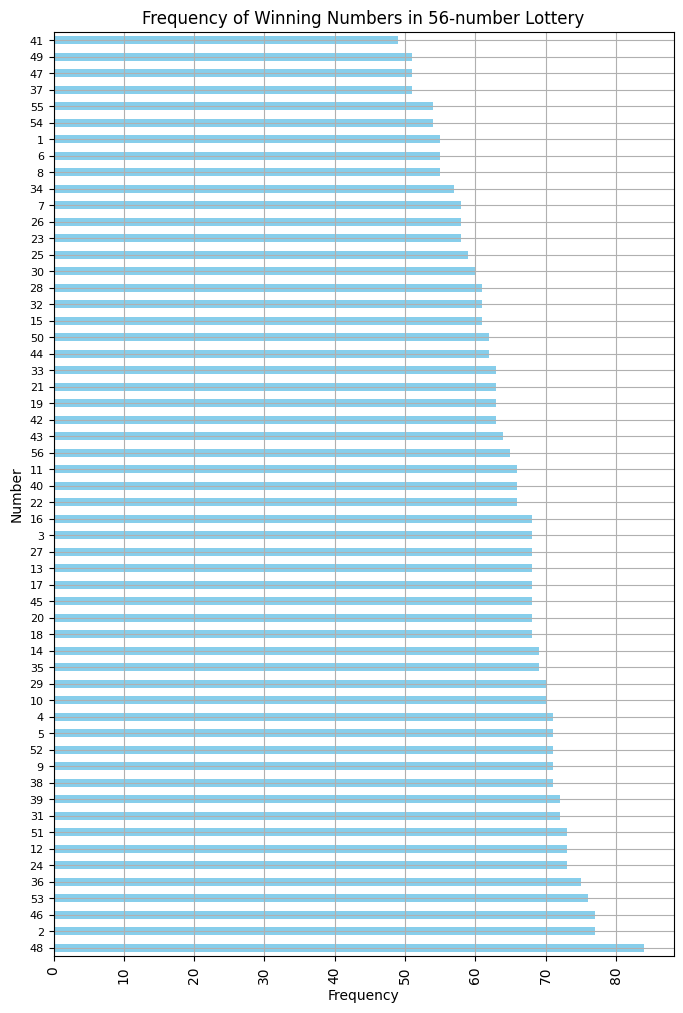

In [60]:
# Visualisierung der Häufigkeit von Gewinnzahlen in df56n / Визуализация частоты выигрышных номеров
frequency56n_sorted.plot(kind='barh', figsize=(8, 12), color='skyblue')
plt.title('Frequency of Winning Numbers in 56-number Lottery')
plt.xlabel('Frequency')
plt.ylabel('Number')
plt.xticks(rotation=90)
plt.yticks(fontsize=8)
plt.grid(True)
#plt.savefig('/content/FrequencyOfWinningNumbers56.png')
plt.show()

In [61]:
# Zählen der Häufigkeit jeder MegaBall / Подсчет частоты каждого MegaBall
frequencyMegaBall_56n = df56n[['Mega Ball']].apply(pd.value_counts).sum(axis=1).astype(int)
# Sortieren die Ergebnisse in absteigender Häufigkeit Reihenfolge / Сортировка результатов по убыванию частоты
frequencyMegaBall_56n_sorted = frequencyMegaBall_56n.sort_values(ascending=False)
print(frequencyMegaBall_56n_sorted)

Mega Ball
36    25
9     22
6     19
44    19
2     19
21    19
25    19
7     19
35    19
19    19
38    18
42    18
15    18
26    18
45    18
24    18
29    17
39    17
34    17
22    17
13    17
20    16
10    16
31    16
4     16
8     16
37    15
12    15
3     15
11    15
41    15
18    14
27    14
23    14
33    14
40    14
16    13
43    12
30    12
17    12
32    12
46    11
14    11
1     11
5     10
28     7
dtype: int64


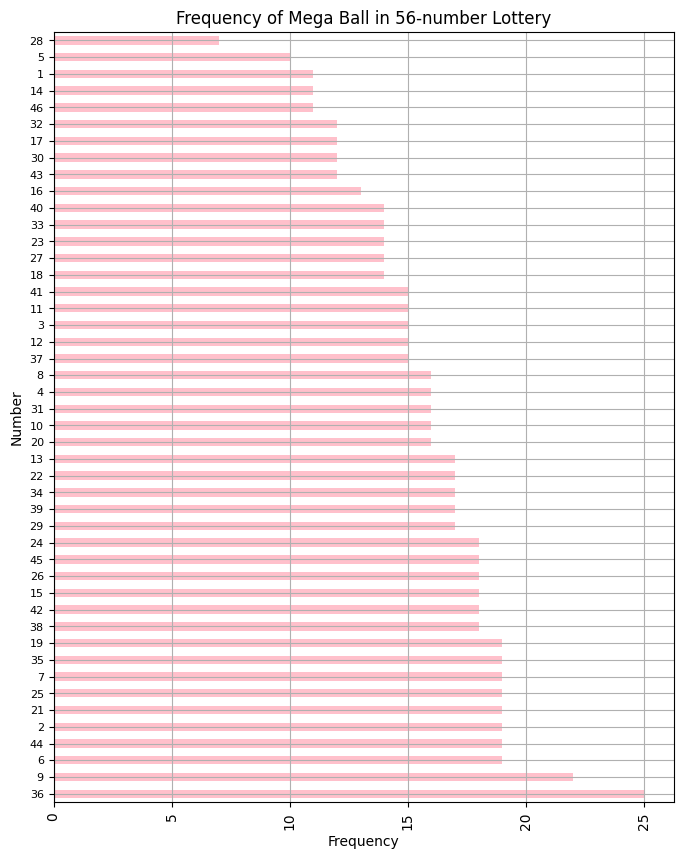

In [62]:
# Visualisierung der Häufigkeit von MegaBall in df56n / Визуализация частоты выигрышных номеров
frequencyMegaBall_56n_sorted.plot(kind='barh', figsize=(8, 10), color='pink')
plt.title('Frequency of Mega Ball in 56-number Lottery')
plt.xlabel('Frequency')
plt.ylabel('Number')
plt.xticks(rotation=90)
plt.yticks(fontsize=8)
plt.grid(True)
#plt.savefig('/content/FrequencyOfMegaBall56nSort.png')
plt.show()

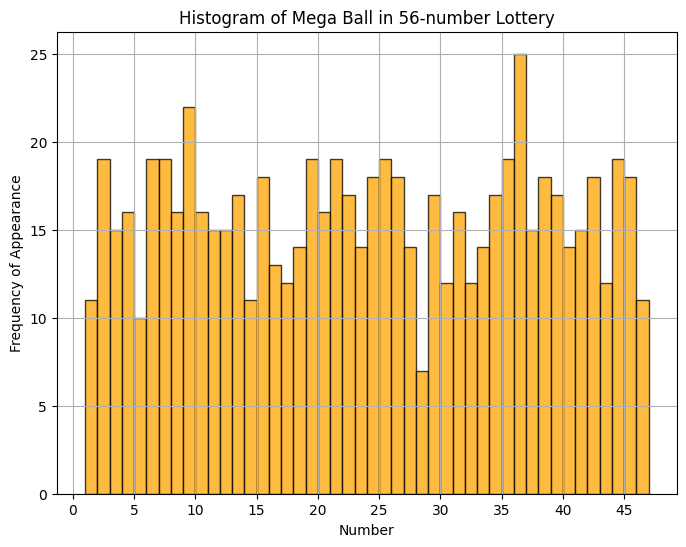

In [63]:
plt.figure(figsize=(8, 6))
plt.hist(df56n['Mega Ball'], bins=range(1, 48), alpha=0.75, edgecolor='black', color='orange')
plt.title('Histogram of Mega Ball in 56-number Lottery')
plt.xlabel('Number')
plt.ylabel('Frequency of Appearance')
plt.xticks(range(0, 50, 5))
plt.grid(True)
plt.show()

In [64]:
numbers75n = df75n[['Number1', 'Number2', 'Number3', 'Number4', 'Number5']]
# Zählen der Häufigkeit jeder Zahl / Подсчет частоты каждого номера
frequency75n = numbers75n.apply(pd.value_counts).sum(axis=1).astype(int)
# Sortieren die Ergebnisse in absteigender Häufigkeit Reihenfolge / Сортировка результатов по убыванию частоты
frequency75n_sorted = frequency75n.sort_values(ascending=False)
print(frequency75n_sorted)

31    40
25    36
51    36
35    35
29    35
      ..
15    20
64    19
55    18
43    17
67    16
Length: 75, dtype: int64


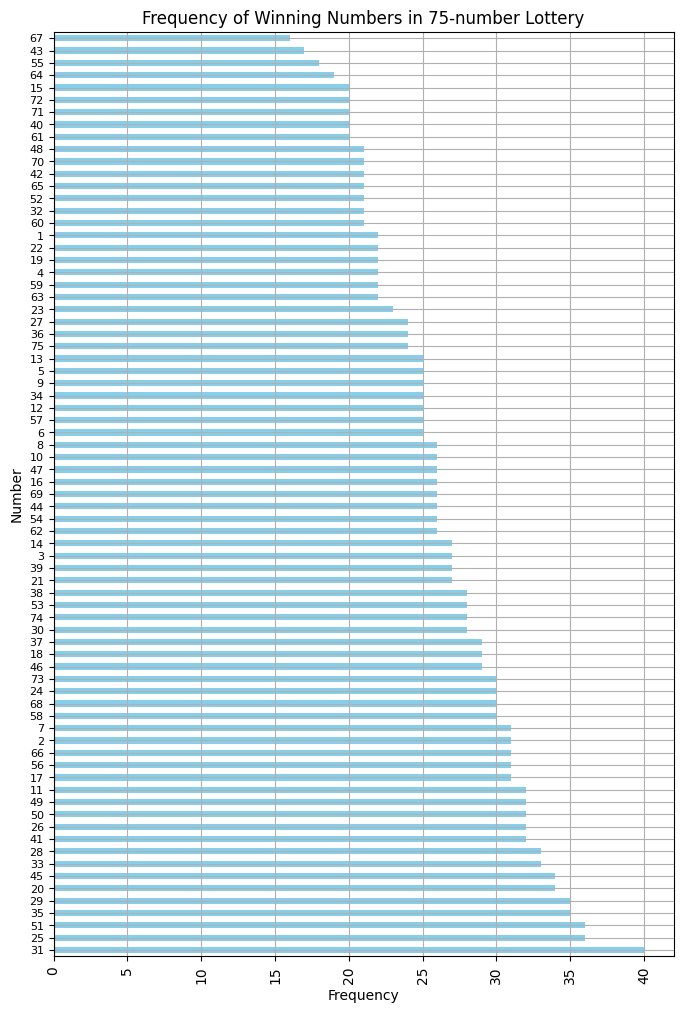

In [65]:
# Visualisierung der Häufigkeit von Gewinnzahlen in df75n / Визуализация частоты выигрышных номеров
frequency75n_sorted.plot(kind='barh', figsize=(8, 12), color='skyblue')
plt.title('Frequency of Winning Numbers in 75-number Lottery')
plt.xlabel('Frequency')
plt.ylabel('Number')
plt.xticks(rotation=90)
plt.yticks(fontsize=8)
plt.grid(True)
plt.show()

In [66]:
# Zählen der Häufigkeit jeder MegaBall in df75n / Подсчет частоты каждого MegaBall
frequencyMegaBall_75n = df75n[['Mega Ball']].apply(pd.value_counts).sum(axis=1).astype(int)
# Sortieren die Ergebnisse in absteigender Häufigkeit Reihenfolge / Сортировка результатов по убыванию частоты
frequencyMegaBall_75n_sorted = frequencyMegaBall_75n.sort_values(ascending=False)
print(frequencyMegaBall_75n_sorted)

Mega Ball
15    34
7     33
10    32
9     31
6     29
1     28
4     27
3     27
12    25
14    25
11    24
2     22
13    21
8     20
5     19
dtype: int64


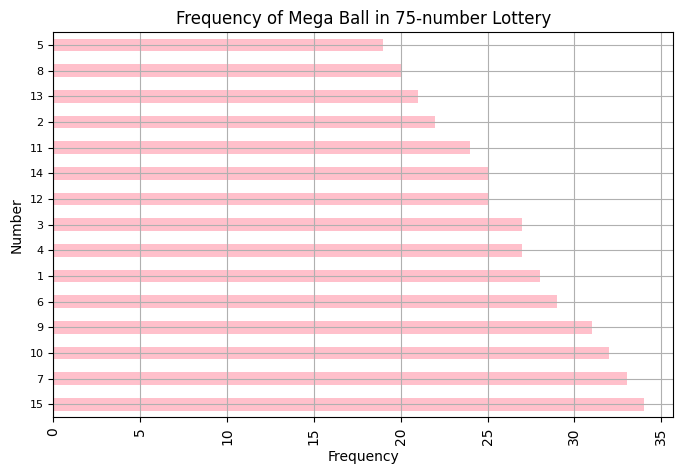

In [67]:
# Visualisierung der Häufigkeit von MegaBall in df75n / Визуализация частоты выигрышных номеров
frequencyMegaBall_75n_sorted.plot(kind='barh', figsize=(8, 5), color='pink')
plt.title('Frequency of Mega Ball in 75-number Lottery')
plt.xlabel('Frequency')
plt.ylabel('Number')
plt.xticks(rotation=90)
plt.yticks(fontsize=8)
plt.grid(True)
plt.show()

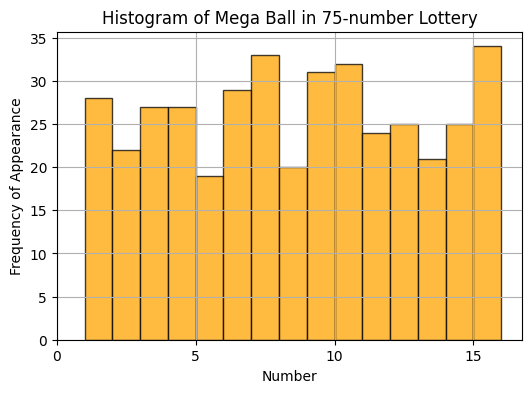

In [68]:
plt.figure(figsize=(6, 4))
plt.hist(df75n['Mega Ball'], bins=range(1, 17), alpha=0.75, edgecolor='black', color='orange')
plt.title('Histogram of Mega Ball in 75-number Lottery')
plt.xlabel('Number')
plt.ylabel('Frequency of Appearance')
plt.xticks(range(0, 20, 5))
plt.grid(True)
plt.show()

In [69]:
numbers70n = df70n[['Number1', 'Number2', 'Number3', 'Number4', 'Number5']]
# Zählen der Häufigkeit jeder Zahl / Подсчет частоты каждого номера
frequency70n = numbers70n.apply(pd.value_counts).sum(axis=1).astype(int)
# Sortieren die Ergebnisse in absteigender Häufigkeit Reihenfolge / Сортировка результатов по убыванию частоты
frequency70n_sorted = frequency70n.sort_values(ascending=False)
print(frequency70n_sorted)

10    57
3     57
17    57
46    56
14    56
      ..
23    35
65    35
50    34
51    32
49    30
Length: 70, dtype: int64


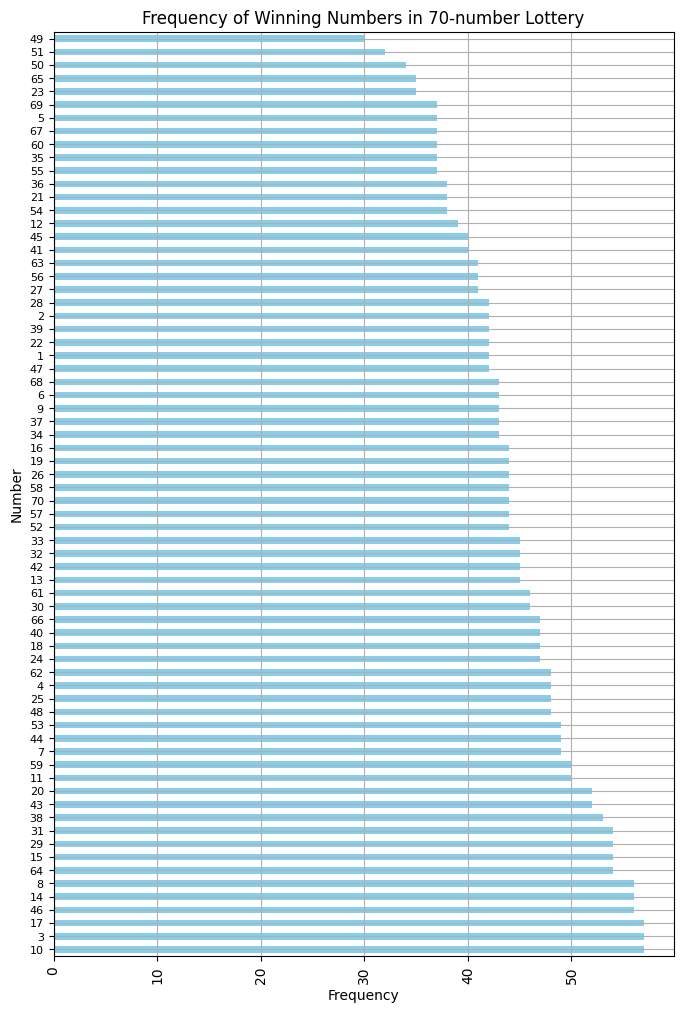

In [70]:
# Visualisierung der Häufigkeit von Gewinnzahlen in df70n / Визуализация частоты выигрышных номеров
frequency70n_sorted.plot(kind='barh', figsize=(8, 12), color='skyblue')
plt.title('Frequency of Winning Numbers in 70-number Lottery')
plt.xlabel('Frequency')
plt.ylabel('Number')
plt.xticks(rotation=90)
plt.yticks(fontsize=8)
plt.grid(True)
plt.show()

In [71]:
# Zählen der Häufigkeit jeder MegaBall in df70n / Подсчет частоты каждого MegaBall
frequencyMegaBall_70n = df70n[['Mega Ball']].apply(pd.value_counts).sum(axis=1).astype(int)
# Sortieren die Ergebnisse in absteigender Häufigkeit Reihenfolge / Сортировка результатов по убыванию частоты
frequencyMegaBall_70n_sorted = frequencyMegaBall_70n.sort_values(ascending=False)
print(frequencyMegaBall_70n_sorted)

Mega Ball
22    35
11    34
18    32
13    30
4     29
24    29
25    29
17    28
9     28
10    26
12    26
19    26
20    25
14    25
21    24
1     24
15    23
6     21
7     20
2     20
3     19
16    19
23    19
5     18
8     17
dtype: int64


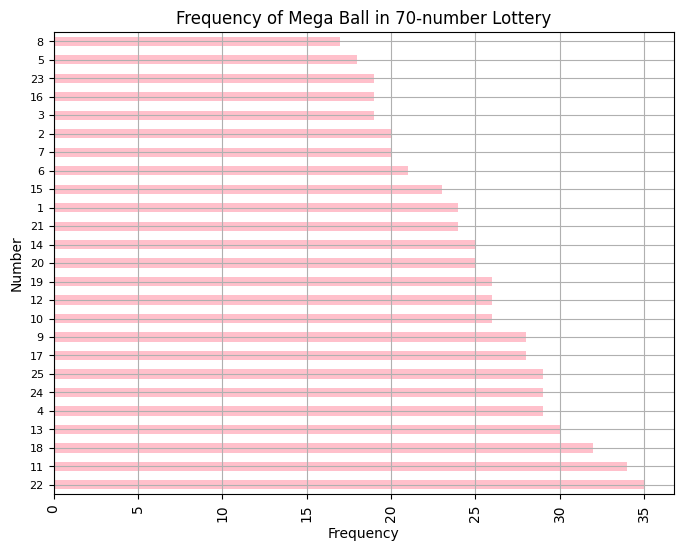

In [72]:
# Visualisierung der Häufigkeit von MegaBall in df70n / Визуализация частоты выигрышных номеров
frequencyMegaBall_70n_sorted.plot(kind='barh', figsize=(8, 6), color='pink')
plt.title('Frequency of Mega Ball in 70-number Lottery')
plt.xlabel('Frequency')
plt.ylabel('Number')
plt.xticks(rotation=90)
plt.yticks(fontsize=8)
plt.grid(True)
plt.show()

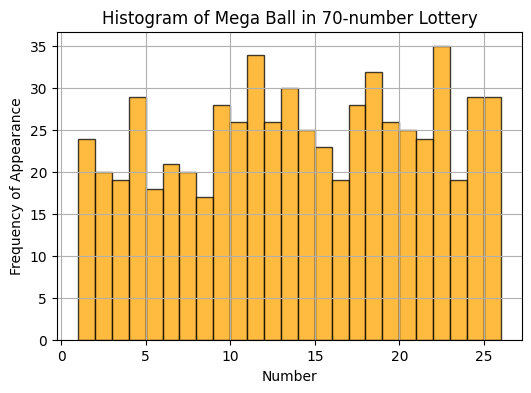

In [73]:
plt.figure(figsize=(6, 4))
plt.hist(df70n['Mega Ball'], bins=range(1, 27), alpha=0.75, edgecolor='black', color='orange')
plt.title('Histogram of Mega Ball in 70-number Lottery')
plt.xlabel('Number')
plt.ylabel('Frequency of Appearance')
plt.xticks(range(0, 30, 5))
plt.grid(True)
plt.show()

**Histogramm für jede Zahl aus df70 separat**

Гистограмма для каждого номера из df70 отдельно

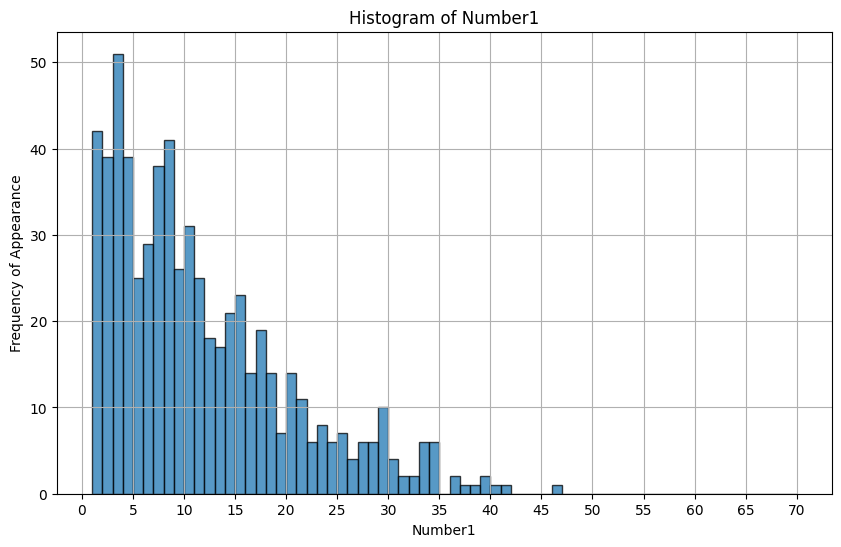

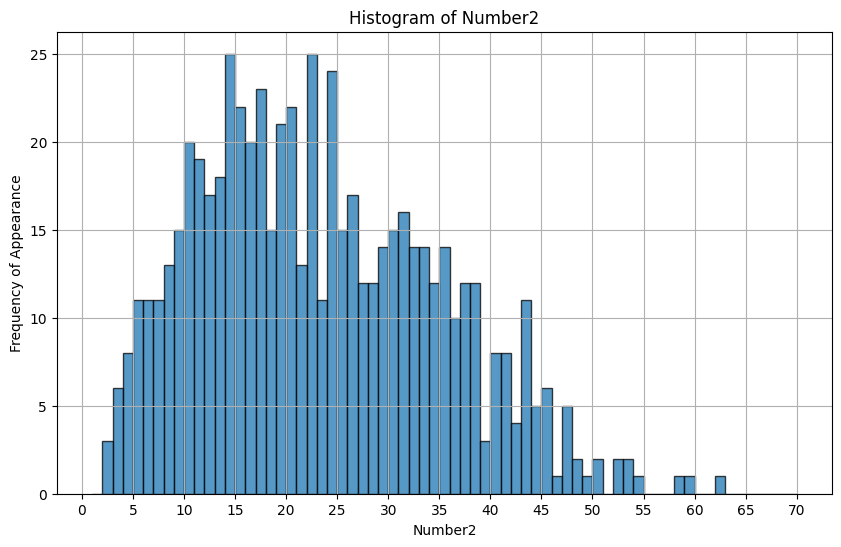

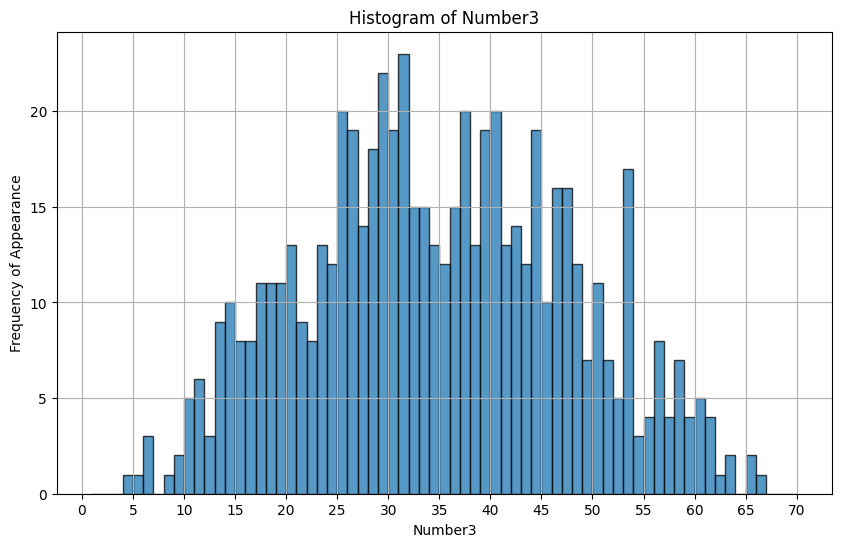

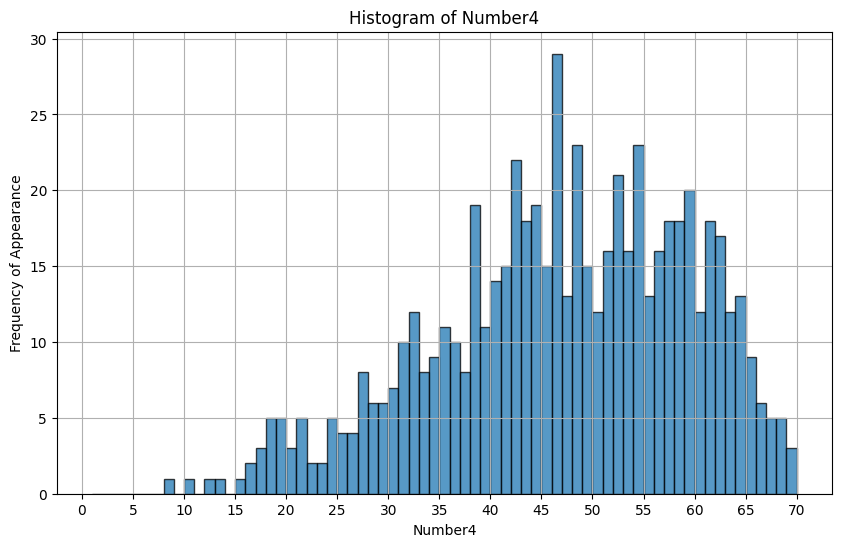

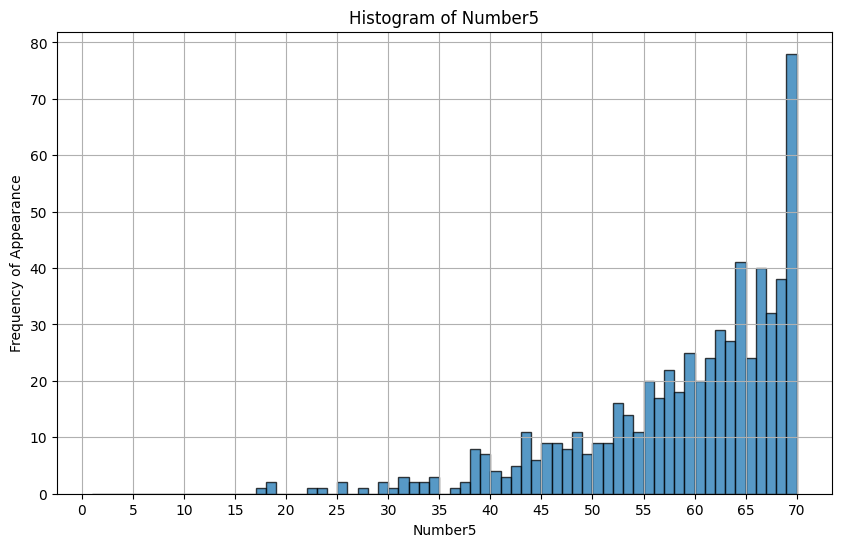

In [35]:
# Daten für die Visualisierung vorbereiten / Подготовка данных для визуализации
numbers_columns = ['Number1', 'Number2', 'Number3', 'Number4', 'Number5']
for column in numbers_columns:
    # Wir erstellen für jede Zahl aus df70 separat ein Histogramm / Строим гистограмму для каждого номера из df70 отдельно
    plt.figure(figsize=(10, 6))
    plt.hist(df70n[column], bins=range(1, 71), alpha=0.75, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('Frequency of Appearance')
    plt.xticks(range(0, 75, 5))
    plt.grid(True)
    plt.show()

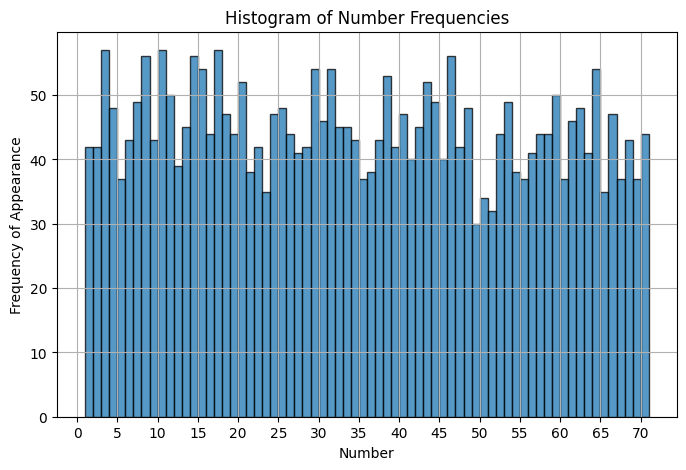

In [36]:
all_numbers = np.arange(1, 71)
frequency70n_complete = frequency70n.reindex(all_numbers, fill_value=0)
plt.figure(figsize=(8, 5))
plt.hist(frequency70n_complete.index, bins=range(1, 72), weights=frequency70n_complete, alpha=0.75, edgecolor='black')
plt.title('Histogram of Number Frequencies')
plt.xlabel('Number')
plt.ylabel('Frequency of Appearance')
plt.xticks(range(0, 75, 5))
plt.grid(True)
plt.show()

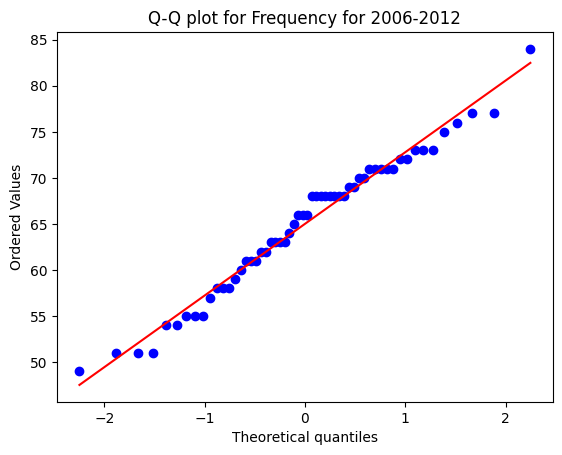

Shapiro-Wilk test for Frequency for 2006-2012: statistic=0.9776617884635925, p-value=0.3826638460159302


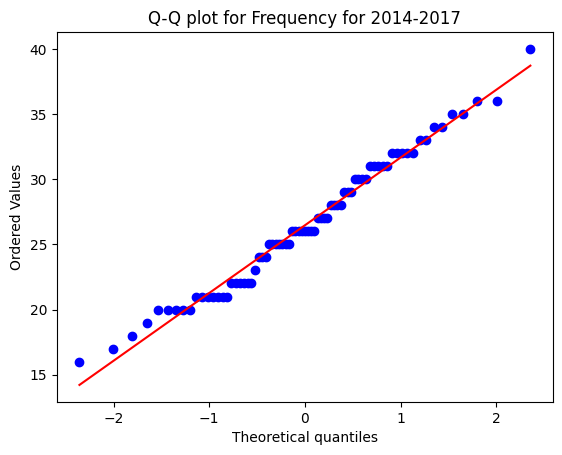

Shapiro-Wilk test for Frequency for 2014-2017: statistic=0.9803626537322998, p-value=0.29582253098487854


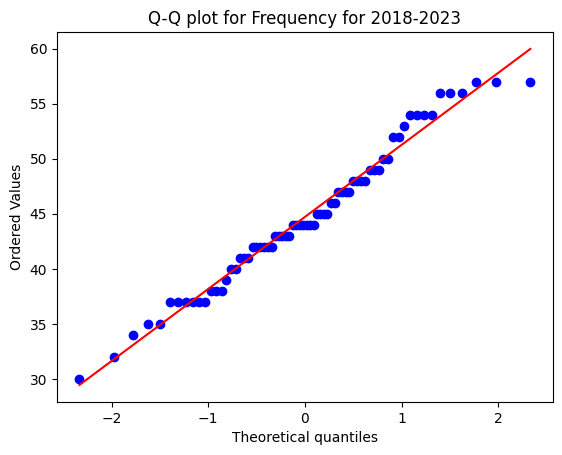

Shapiro-Wilk test for Frequency for 2018-2023: statistic=0.9760276079177856, p-value=0.19877897202968597


In [37]:
# Bilden eines Q-Q-Plots für für jeden Datensatz / Построение Q-Q plot для каждого датасета
datasets = [frequency56n, frequency75n, frequency70n]
titles = ['Frequency for 2006-2012', 'Frequency for 2014-2017', 'Frequency for 2018-2023']

for data, title in zip(datasets, titles):
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f'Q-Q plot for {title}')
    plt.show()
# Zur Überprüfung der Normalität der Datenverteilung führen wir den Shapiro-Wilk-Test durch / Проводим тест Шапиро-Уилка для проверки нормальности распределения данных
    shapiro_test = stats.shapiro(data)
    print(f"Shapiro-Wilk test for {title}: statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")

Ein Q-Q-Diagramm vergleicht die Quantile der Häufigkeitsverteilung eines Datensatzes mit einer theoretischen Normalverteilung. Die Tatsache, dass die meisten unserer Datenpunkte entlang einer geraden Linie liegen (mit einigen Abweichungen an den Enden), legt nahe, dass die Häufigkeit des Auftretens von Zahlen ungefähr einer Normalverteilung folgt.

Der Shapiro-Wilk-Test überprüft zusätzlich die Normalität der Daten. Das Testergebnis liefert einen p-Wert, der verwendet werden kann, um zu bestimmen, ob die Nullhypothese, dass die Daten normalverteilt sind, abgelehnt werden soll. Ein hoher p-Wert (normalerweise größer als 0,05) bedeutet, dass die Hypothese der Normalität nicht verworfen werden kann, was darauf hinweist, dass die Daten für bestimmte statistische Tests und die Konstruktion von Konfidenzintervallen, die Normalität annehmen, als normalverteilt behandelt werden können.


График Q-Q сравнивает квантили распределения частот набора данных с теоретическим нормальным распределением. Тот факт, что большинство наших точек данных лежит вдоль прямой линии (с некоторым отклонением на концах), предполагает, что частота появления чисел приблизительно следует нормальному распределению.

Тест Шапиро-Уилка дополнительно проверяет нормальность данных. Результат теста предоставляет p-значение, которое можно использовать для определения, следует ли отвергать нулевую гипотезу о том, что данные имеют нормальное распределение. Высокое p-значение (обычно больше 0,05) означает, что нельзя отвергнуть гипотезу о нормальности, что указывает на возможность рассматривать данные как нормально распределённые для целей определённых статистических тестов и построения доверительных интервалов, которые предполагают нормальность.

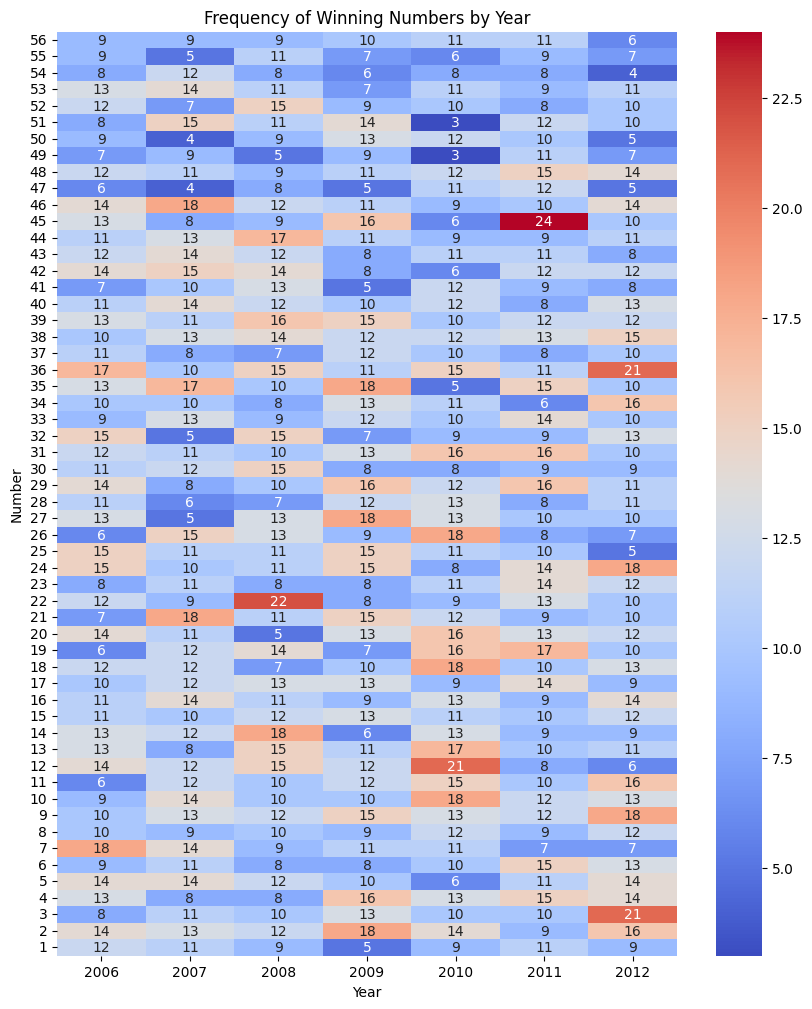

In [74]:
df56n = pd.DataFrame(df56n)
# Konvertieren Daten zur Analyse, mit Ausnahme Draw Date / Преобразование данных для анализа, исключая Draw Date
df56n_melted = df56n.drop(columns=['Draw Date']).melt(id_vars=['Year'], var_name='Number', value_name='Value')
# Konvertieren Value in das Zahlenformat in df_melted / Преобразование столбца Value в df_melted из строк в числовой формат
df56n_melted['Value'] = pd.to_numeric(df56n_melted['Value'], errors='coerce').fillna(0).astype(int)
# Zählen die Häufigkeit jeder Zahl pro Jahr / Подсчет частоты появления каждого номера по годам
frequency_df56n = df56n_melted.groupby(['Year', 'Value']).size().reset_index(name='Frequency')
# Pivotieren von Daten für eine Heatmap / Пивотирование данных для тепловой карты
heatmap_df56n = frequency_df56n.pivot(index='Year', columns='Value', values='Frequency').fillna(0).astype(int)
# DataFrame transponieren / Транспонирование DataFrame
transposed_heatmap_df56n = heatmap_df56n.T
# Sortieren von DataFrame-Indizes in der gewünschten Reihenfolge / Сортировка индексов DataFrame в нужном порядке
transposed_heatmap_df56n = transposed_heatmap_df56n.sort_index(ascending=False)
# Visualisierung einer transponierten Heatmap / Визуализация транспонированной тепловой карты
plt.figure(figsize=(10, 12))
sns.heatmap(transposed_heatmap_df56n, cmap='coolwarm', annot=True)
plt.title('Frequency of Winning Numbers by Year')
plt.xlabel('Year')
plt.ylabel('Number')
plt.show()


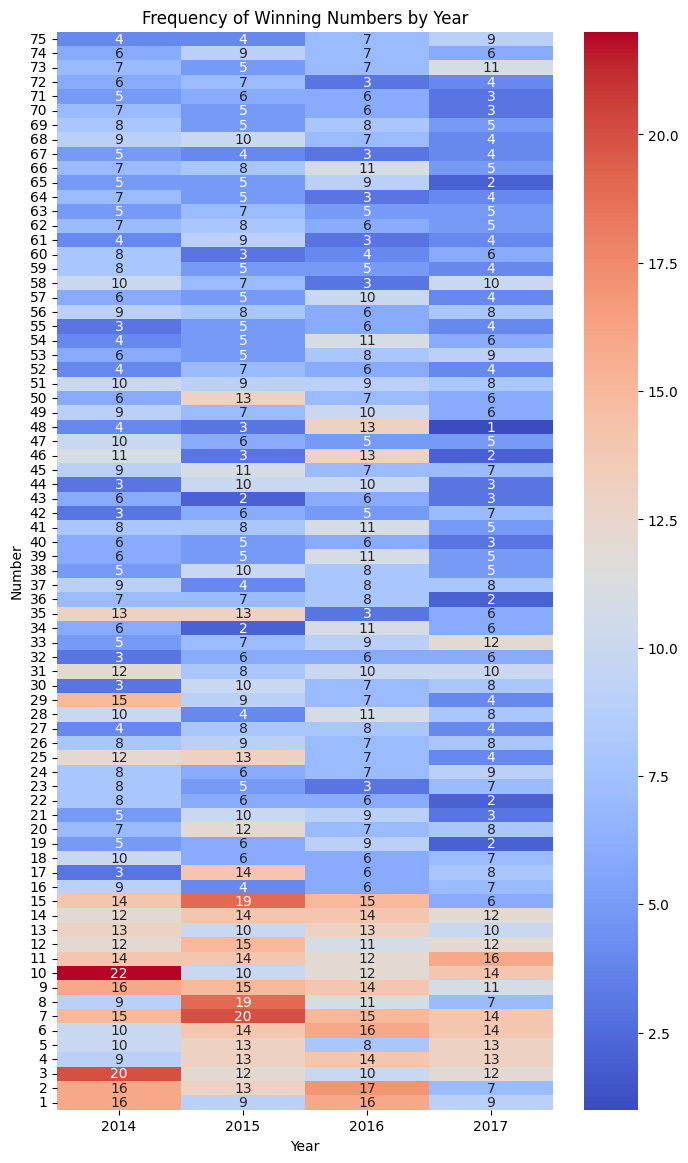

In [75]:
df75n = pd.DataFrame(df75n)
# Konvertieren Daten zur Analyse, mit Ausnahme Draw Date / Преобразование данных для анализа, исключая Draw Date
df75n_melted = df75n.drop(columns=['Draw Date']).melt(id_vars=['Year'], var_name='Number', value_name='Value')
# Konvertieren Value in das Zahlenformat in df_melted / Преобразование столбца Value в df_melted из строк в числовой формат
df75n_melted['Value'] = pd.to_numeric(df75n_melted['Value'], errors='coerce').fillna(0).astype(int)
# Zählen die Häufigkeit jeder Zahl pro Jahr / Подсчет частоты появления каждого номера по годам
frequency_df75n = df75n_melted.groupby(['Year', 'Value']).size().reset_index(name='Frequency')
# Pivotieren von Daten für eine Heatmap / Пивотирование данных для тепловой карты
heatmap_df75n = frequency_df75n.pivot(index='Year', columns='Value', values='Frequency').fillna(0).astype(int)
# DataFrame transponieren / Транспонирование DataFrame
transposed_heatmap_df75n = heatmap_df75n.T
# Sortieren von DataFrame-Indizes in der gewünschten Reihenfolge / Сортировка индексов DataFrame в нужном порядке
transposed_heatmap_df75n = transposed_heatmap_df75n.sort_index(ascending=False)
# Visualisierung einer transponierten Heatmap / Визуализация транспонированной тепловой карты
plt.figure(figsize=(8, 14))
sns.heatmap(transposed_heatmap_df75n, cmap='coolwarm', annot=True)
plt.title('Frequency of Winning Numbers by Year')
plt.xlabel('Year')
plt.ylabel('Number')
plt.show()

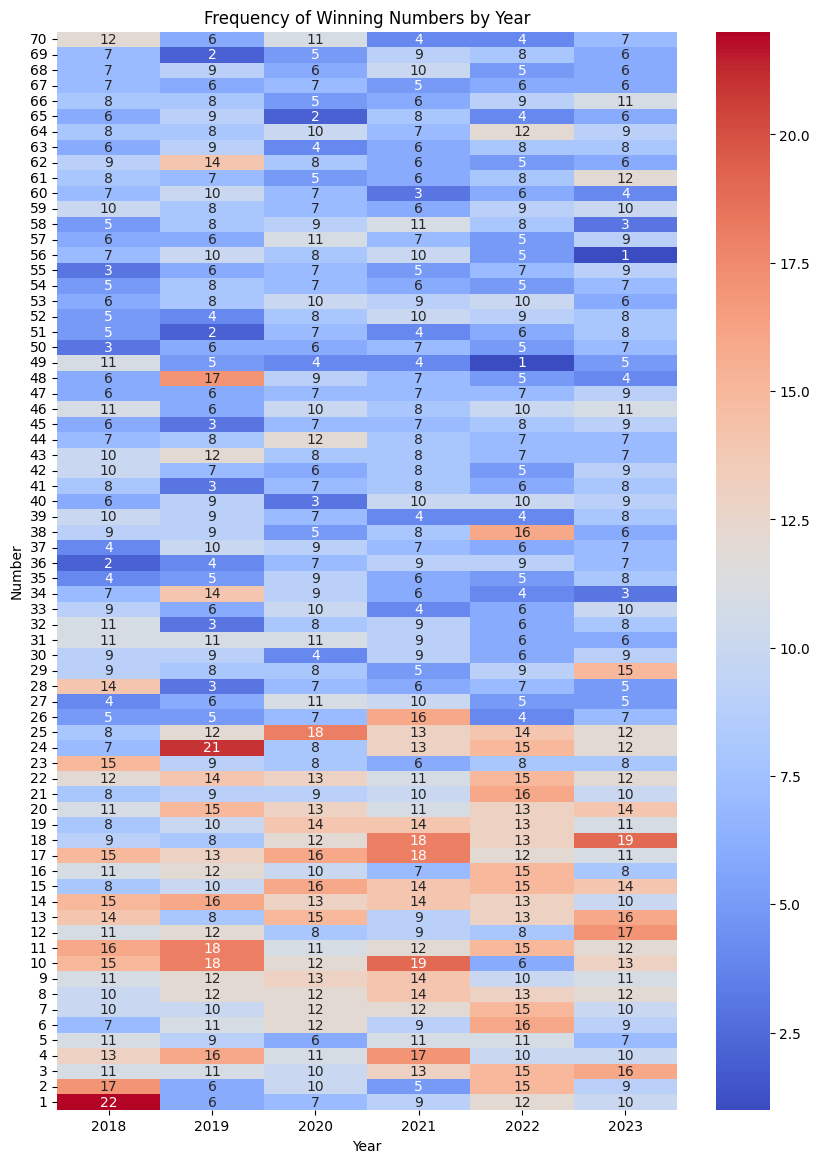

In [76]:
df70n = pd.DataFrame(df70n)
# Konvertieren Daten zur Analyse, mit Ausnahme Draw Date / Преобразование данных для анализа, исключая Draw Date
df70n_melted = df70n.drop(columns=['Draw Date']).melt(id_vars=['Year'], var_name='Number', value_name='Value')
# Konvertieren Value in das Zahlenformat in df_melted / Преобразование столбца Value в df_melted из строк в числовой формат
df70n_melted['Value'] = pd.to_numeric(df70n_melted['Value'], errors='coerce').fillna(0).astype(int)
# Zählen die Häufigkeit jeder Zahl pro Jahr / Подсчет частоты появления каждого номера по годам
frequency_df70n = df70n_melted.groupby(['Year', 'Value']).size().reset_index(name='Frequency')
# Pivotieren von Daten für eine Heatmap / Пивотирование данных для тепловой карты
heatmap_df70n = frequency_df70n.pivot(index='Year', columns='Value', values='Frequency').fillna(0).astype(int)
# DataFrame transponieren / Транспонирование DataFrame
transposed_heatmap_df70n = heatmap_df70n.T
# Sortieren von DataFrame-Indizes in der gewünschten Reihenfolge / Сортировка индексов DataFrame в нужном порядке
transposed_heatmap_df70n = transposed_heatmap_df70n.sort_index(ascending=False)
# Visualisierung einer transponierten Heatmap / Визуализация транспонированной тепловой карты
plt.figure(figsize=(10, 14))
sns.heatmap(transposed_heatmap_df70n, cmap='coolwarm', annot=True)
plt.title('Frequency of Winning Numbers by Year')
plt.xlabel('Year')
plt.ylabel('Number')
plt.show()

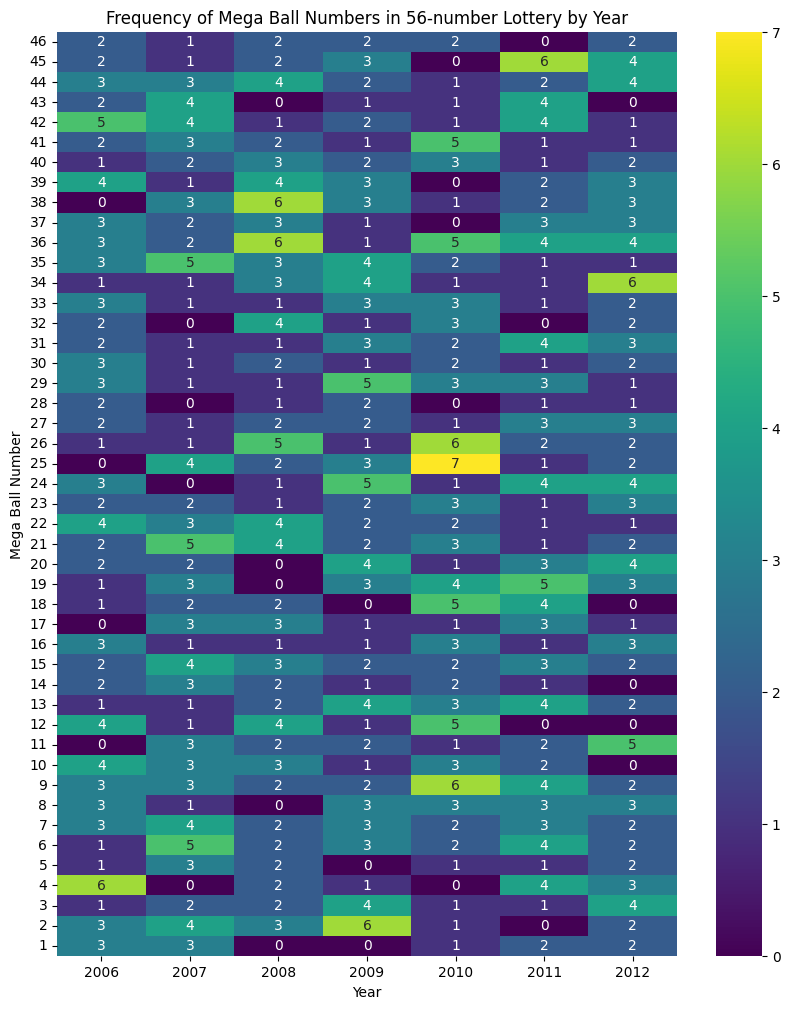

In [77]:
# Datenaufbereitung / Подготовка данных
frequencyMegaBall_56n = df56n.groupby(['Year', 'Mega Ball']).size().reset_index(name='Frequency')
# Erstellen einer Pivot-Tabelle / Создание сводной таблицы
megaball_heatmap_df56n = frequencyMegaBall_56n.pivot(index='Mega Ball', columns='Year', values='Frequency').fillna(0).astype(int)
# Sortieren Sie DataFrame nach Index in aufsteigender Reihenfolge / Сортировка DataFrame по индексу в возрастающем порядке
megaball_heatmap_df56n = megaball_heatmap_df56n.sort_index(ascending=False)

# Heatmap-Visualisierung / Визуализация тепловой карты
plt.figure(figsize=(10, 12))
sns.heatmap(megaball_heatmap_df56n, cmap='viridis', annot=True, fmt="d", yticklabels=True)
plt.title('Frequency of Mega Ball Numbers in 56-number Lottery by Year')
plt.ylabel('Mega Ball Number')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

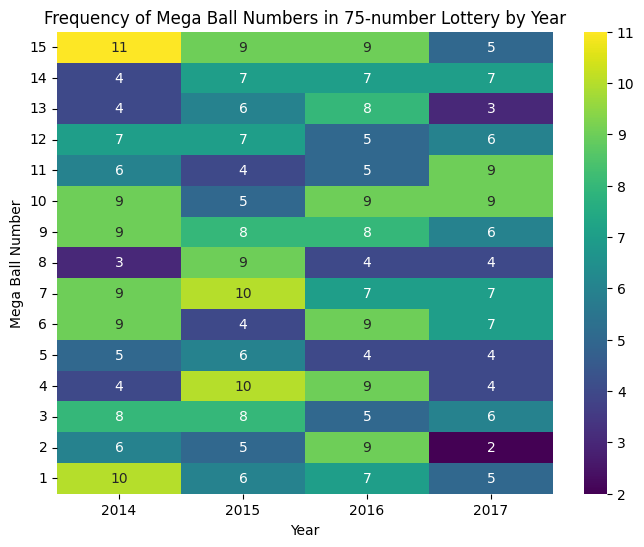

In [78]:
# Datenaufbereitung / Подготовка данных
frequencyMegaBall_75n = df75n.groupby(['Year', 'Mega Ball']).size().reset_index(name='Frequency')
# Erstellen einer Pivot-Tabelle / Создание сводной таблицы
megaball_heatmap_df75n = frequencyMegaBall_75n.pivot(index='Mega Ball', columns='Year', values='Frequency').fillna(0).astype(int)
# Sortieren Sie DataFrame nach Index in aufsteigender Reihenfolge / Сортировка DataFrame по индексу в возрастающем порядке
megaball_heatmap_df75n = megaball_heatmap_df75n.sort_index(ascending=False)

# Heatmap-Visualisierung / Визуализация тепловой карты
plt.figure(figsize=(8, 6))
sns.heatmap(megaball_heatmap_df75n, cmap='viridis', annot=True, fmt="d", yticklabels=True)
plt.title('Frequency of Mega Ball Numbers in 75-number Lottery by Year')
plt.ylabel('Mega Ball Number')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

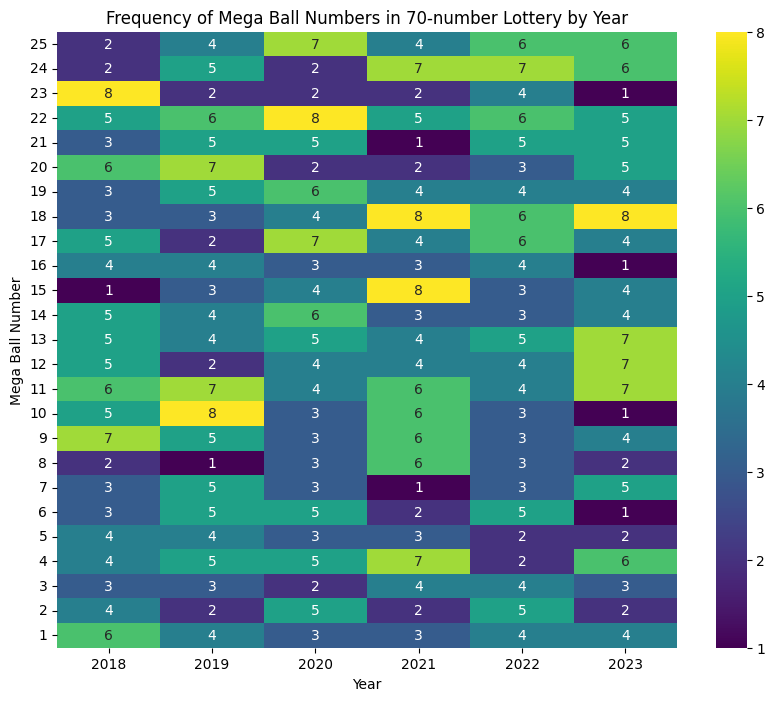

In [79]:
# Datenaufbereitung / Подготовка данных
frequencyMegaBall_70n = df70n.groupby(['Year', 'Mega Ball']).size().reset_index(name='Frequency')
# Erstellen einer Pivot-Tabelle / Создание сводной таблицы
megaball_heatmap_df70n = frequencyMegaBall_70n.pivot(index='Mega Ball', columns='Year', values='Frequency').fillna(0).astype(int)
# Sortieren Sie DataFrame nach Index in aufsteigender Reihenfolge / Сортировка DataFrame по индексу в возрастающем порядке
megaball_heatmap_df70n = megaball_heatmap_df70n.sort_index(ascending=False)

# Heatmap-Visualisierung / Визуализация тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(megaball_heatmap_df70n, cmap='viridis', annot=True, fmt="d", yticklabels=True)
plt.title('Frequency of Mega Ball Numbers in 70-number Lottery by Year')
plt.ylabel('Mega Ball Number')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

**Überprüfung, ob die Tendenz des Erscheinens zweier aufeinanderfolgender Zahlen statistisch signifikant ist**

Проверяю является ли тенденция выпадения двух последовательных номеров статистически значимой

In [101]:
#Funktion zur Berechnung des Prozentsatzes der Zeilen mit fortlaufenden Nummern / Функция для расчета процента строк с последовательными номерами
def calculate_consecutive_percent(df):
    # Konvertieren die Spalten mit Zahlen in das numerische Format / Конвертируем столбцы с номерами в числовой формат
    cols = ['Number1', 'Number2', 'Number3', 'Number4', 'Number5']
    df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
    # Funktion zur Überprüfung des Vorhandenseins fortlaufender Nummern / Функция для проверки наличия последовательных номеров
    def has_consecutive_numbers(row):
        numbers = sorted(row.dropna().values)  # Sort and handle NaNs
        return any(numbers[i] + 1 == numbers[i + 1] for i in range(len(numbers) - 1))
    # Anwenden einer Funktion auf jede Zeile / Применяем функцию к каждой строке
    df['has_consecutive'] = df[cols].apply(has_consecutive_numbers, axis=1)
    # Berechnen den Prozentsatz der Zeilen mit fortlaufenden Nummern / ассчитываем процент строк с последовательными номерами
    percentage = df['has_consecutive'].mean() * 100
    return percentage

# Wenden die Funktion auf jeden Datenrahmen an und zeigen Sie die Ergebnisse an / Применяем функцию к каждому датафрейму и выводим результаты
print(f"Percentage in df56n: {calculate_consecutive_percent(df56n):.2f}%")
print(f"Percentage in df75n: {calculate_consecutive_percent(df75n):.2f}%")
print(f"Percentage in df70n: {calculate_consecutive_percent(df70n):.2f}%")

Percentage in df56n: 35.44%
Percentage in df75n: 26.20%
Percentage in df70n: 26.36%


Die Wahrscheinlichkeit, zwei aufeinanderfolgende Zahlen zu ziehen, ist in df56n am höchsten – bei einer Lotterie mit weniger Zahlen. Dies liegt daran, dass bei einem kleineren Zahlenbereich die Wahrscheinlichkeit größer ist, dass jede Zahl an eine andere Zahl in der Folge angrenzt, wodurch sich die Anzahl möglicher nicht benachbarter Kombinationen verringert. So ist in df56n, wo die Zahlen bis zu 56 reichen, der Prozentsatz aufeinanderfolgender Kombinationen höher als in df75n und df70n, wo die Zahlenbereiche auf 75 bzw. 70 erweitert werden.

Der Prozentsatz der von Ihnen gefundenen Sequenznummern ist weder besonders hoch noch sehr niedrig. Es ist groß genug, um Aufmerksamkeit zu erregen, aber nicht groß genug, um eindeutig auf das Vorhandensein eines statistisch signifikanten Musters hinzuweisen.

Вероятность того, что выпадут два последовательных номера, наиболее высокая в df56n - в лотерее с меньшим количеством чисел. Это связано с тем, что при меньшем диапазоне чисел каждое число имеет больший шанс оказаться рядом с другим числом в последовательности, уменьшая количество возможных несмежных комбинаций. Таким образом, в df56n, где номера до 56, процент последовательных комбинаций выше, чем в df75n и df70n, где диапазоны номеров расширены до 75 и 70 соответственно.

Процент последовательных номеров, который мы обнаружили, не является ни особенно высоким, ни очень низким. Он достаточен для того, чтобы обратить на него внимание, но не настолько велик, чтобы однозначно указывать на наличие статистически значимой закономерности.

**Datenaufbereitung und Trendanalyse**

Der Zweck dieser Analyse besteht darin, Trends in der Häufigkeit des Auftretens verschiedener Zahlen in der Mega Millions-Lotterie im Laufe der Zeit zu untersuchen. Dadurch können Sie feststellen, welche Nummern über verschiedene Zeiträume hinweg mehr oder weniger beliebt werden.

Analyseschritte:
* **Datenvorbereitung:** Verwendet DataFrame heatmap_df70n, wobei jede Spalte
stellt eine einzelne Zahl dar, und die Zeilen können die Häufigkeit des Auftretens dieser Zahl in verschiedenen Zeiträumen darstellen.
* **Hinzufügen einer Konstante:** Für jede Zahl wird ein Array X mit einer Konstante und einem Index (Zeit) erstellt, wodurch das Modell Intercept berücksichtigen kann.
* **Regressionsmodell:** Für jede Zahl wird ein OLS-Modell (Ordinary Least Squares) erstellt, wobei die abhängige Variable y die Häufigkeit der Zahl und die unabhängigen Variablen die Zeit sind.
* **Ergebnisse speichern:** Modellergebnisse, einschließlich Steigung, Achsenabschnitt und p-Wert, werden im Trendwörterbuch gespeichert.
* **Konvertieren von Ergebnissen in einen DataFrame:** Das Trends-Wörterbuch wird zur einfacheren Datenanalyse und -visualisierung in einen DataFrame „trends_df“ konvertiert.

Mit diesem Ansatz können Sie Trends in der Häufigkeit jeder Nummer im Zeitverlauf analysieren und feststellen, welche Nummern immer beliebter oder weniger beliebt werden.

**Подготовка данных и анализ тенденций**

Целью данного анализа является исследование тенденций изменения частоты появления различных номеров в лотерее "Mega Millions" по времени. Это позволяет определить, какие номера становятся более или менее популярными в разные периоды времени.

Шаги анализа:
* **Подготовка данных:** Используется DataFrame heatmap_df70n, где каждый столбец
представляет собой отдельный номер, а строки могут представлять частоту появления этого номера в разные временные периоды.
* **Добавление константы:** Для каждого номера создаётся массив X с константой и индексом (время), что позволяет модели учесть перехват (Intercept).
* **Регрессионная модель:** Для каждого номера строится модель OLS (обыкновенные наименьшие квадраты), где зависимая переменная y — это частоты номера, а независимые переменные — время.
* **Сохранение результатов:** Результаты модели, включая уклон (slope), перехват (intercept) и значение p-value, сохраняются в словаре trends.
* **Преобразование результатов в DataFrame:** Словарь trends преобразуется в DataFrame trends_df для удобства анализа и визуализации данных.

Этот подход позволяет анализировать тенденции изменения частоты каждого номера по времени и определять, какие номера становятся более или менее популярными.

In [80]:
trends = {}
for column in heatmap_df70n.columns:
    # Prüfen, ob eine Spalte numerisch ist / Проверяем, является ли столбец числовым
    if pd.api.types.is_numeric_dtype(heatmap_df70n[column]):
        X = sm.add_constant(np.arange(len(heatmap_df70n)))  # Zeit / Время
        y = heatmap_df70n[column].astype(float).values  # Häufigkeit des Vorkommens der Zahl / Частота появления номера
        model = sm.OLS(y, X)
        results = model.fit()
        # Speichern die Ergebnisse für jede Zahl / Сохраняем результаты для каждого номера
        trends[column] = {'Slope': results.params[1], 'Intercept': results.params[0], 'P-value': results.pvalues[1]}

# Konvertieren eines Wörterbuchs in einen DataFrame zur Analyse / Преобразуем словарь в DataFrame для удобства анализа
trends_df = pd.DataFrame(trends).T
# Legen Sie Optionen fest, um alle Zeilen anzuzeigen / Установка параметров для отображения всех строк
pd.set_option('display.max_rows', None)
print(trends_df)

           Slope  Intercept   P-value
1  -1.142857e+00  13.857143  0.471809
2  -5.142857e-01  11.619048  0.703525
3   1.142857e+00   9.809524  0.019820
4  -7.714286e-01  14.761905  0.345090
5  -2.571429e-01   9.809524  0.681236
6   6.285714e-01   9.095238  0.464677
7   4.285714e-01  10.428571  0.424463
8   4.285714e-01  11.095238  0.204913
9  -1.428571e-01  12.190476  0.730640
10 -1.114286e+00  16.619048  0.379244
11 -8.000000e-01  16.000000  0.265661
12  5.428571e-01   9.476190  0.568873
13  5.428571e-01  11.142857  0.549251
14 -9.428571e-01  15.857143  0.031797
15  1.228571e+00   9.761905  0.095713
16 -2.571429e-01  11.142857  0.751855
17 -6.000000e-01  15.666667  0.400541
18  2.028571e+00   8.095238  0.037760
19  6.857143e-01   9.952381  0.279826
20  2.000000e-01  12.333333  0.656045
21  9.142857e-01   8.047619  0.212910
22  2.857143e-02  12.761905  0.945553
23 -1.142857e+00  11.857143  0.129203
24  3.428571e-01  11.809524  0.811826
25  6.000000e-01  11.333333  0.502615
26  4.571429

Diese Ergebnisse für eine lineare Regression jeder Lotteriezahl zeigen den Steigungskoeffizienten und den p-Wert. Der Steigungskoeffizient gibt die Richtung des Trends an (ein positiver Wert bedeutet eine Zunahme der Häufigkeit, ein negativer Wert bedeutet eine Abnahme) und der p-Wert gibt die statistische Signifikanz des Trends an.

- Zahlen mit signifikanten negativen Trends und niedrigen p-Werten (z. B. Zahl 14 mit Steigung −0,942857 und P-Wert 0,031797) zeigen einen statistisch signifikanten Rückgang der Häufigkeit des Auftretens im Laufe der Zeit.
- Zahlen mit signifikanten positiven Trends und niedrigen p-Werten (z. B. Zahl 18 mit Steigung 2,028571 und P-Wert 0,037760) zeigen einen statistisch signifikanten Anstieg der Häufigkeit.

Эти результаты для линейной регрессии каждого номера в лотерее показывают коэффициент наклона Slope и значение p-value. Коэффициент наклона указывает на направление тренда (положительное значение означает увеличение частоты, отрицательное — уменьшение), а p-value говорит о статистической значимости этого тренда.

* Числа с значительными отрицательными трендами и низкими p-значениями (например, номер 14 со Slope −0.942857 и P-value 0.031797) показывают статистически значимое уменьшение частоты появления со временем.
* Номера с значительными положительными трендами и низкими p-значениями (например, номер 18 со Slope 2.028571 и P-value 0.037760) показывают статистически значимое увеличение частоты.

Ich werde keine Prognose für eine Lotterie mit 56 Zahlen und 75 Zahlen abgeben, weil sie existierte 2013 nicht mehr und es wäre klüger, sich auf die Analyse der aktuellen 70-Zahlen-Lotterie zu konzentrieren.

Die Vorhersage der Häufigkeit von Lotteriezahlen basiert auf ihren vorherigen Trends (Steigung und Achsenabschnitt werden durch lineare Regression bestimmt). In der Schleife wird für jede signifikante Zahl (d. h. Zahlen mit einem p-Wert kleiner als 0,1) eine vorhergesagte Häufigkeit basierend auf der Trendliniengleichung berechnet, wobei Intercept der Anfangswert (Intercept) und Slope die Änderungsrate ist Häufigkeit im Laufe der Jahre. Anschließend werden für jedes Jahr aus dem angegebenen Bereich die vorhergesagten Werte berechnet. Der resultierende Datenrahmen „predicted_df70n“ wird normalisiert, sodass sich die Werte in jedem Jahr auf 1 summieren, wodurch die Ergebnisse als Wahrscheinlichkeiten für die Wahl jeder Zahl in einem bestimmten Jahr interpretiert werden können.

я не буду делать прогноз для лотереи из 56 номеров и из 75 номеров, т.к. она прекратила свое существование в 2013 году и будет разумнее сконцентрироваться на анализе текущей лотереи из 70 номеров

Прогнозирование частоты появления чисел в лотерее  основывается на их предыдущих трендах (наклон и перехват, определённые через линейную регрессию). В цикле для каждого значимого номера (т.е., номеров с p-value меньше 0.1) вычисляется прогнозируемая частота на основе уравнения линии тренда, где Intercept является начальным значением (перехват), а Slope — скорость изменения частоты по годам. Затем, для каждого года из заданного диапазона, вычисляются прогнозируемые значения. Полученный датафрейм predicted_df70n нормализуется, чтобы значения в каждом году суммировались в 1, что позволяет интерпретировать результаты как вероятности выбора каждого номера в данном году.

            3         8         11        14        15        18        19  \
2023  0.046200  0.048610  0.064117  0.062912  0.046360  0.042704  0.044874   
2024  0.051367  0.050760  0.061155  0.059335  0.051893  0.051610  0.048091   
2025  0.056605  0.052940  0.058153  0.055709  0.057501  0.060637  0.051352   
2026  0.061916  0.055150  0.055109  0.052034  0.063187  0.069788  0.054658   
2027  0.067300  0.057391  0.052023  0.048307  0.068951  0.079067  0.058010   

            21        23        31  ...        49        50        51  \
2023  0.037803  0.045195  0.045557  ...  0.028684  0.020649  0.018158   
2024  0.041943  0.040649  0.040770  ...  0.023783  0.022974  0.021194   
2025  0.046139  0.036040  0.035918  ...  0.018814  0.025330  0.024271   
2026  0.050394  0.031368  0.030999  ...  0.013777  0.027719  0.027391   
2027  0.054707  0.026631  0.026012  ...  0.008671  0.030140  0.030553   

            52        55        56        60        61        62        70  
2023  0.025149 

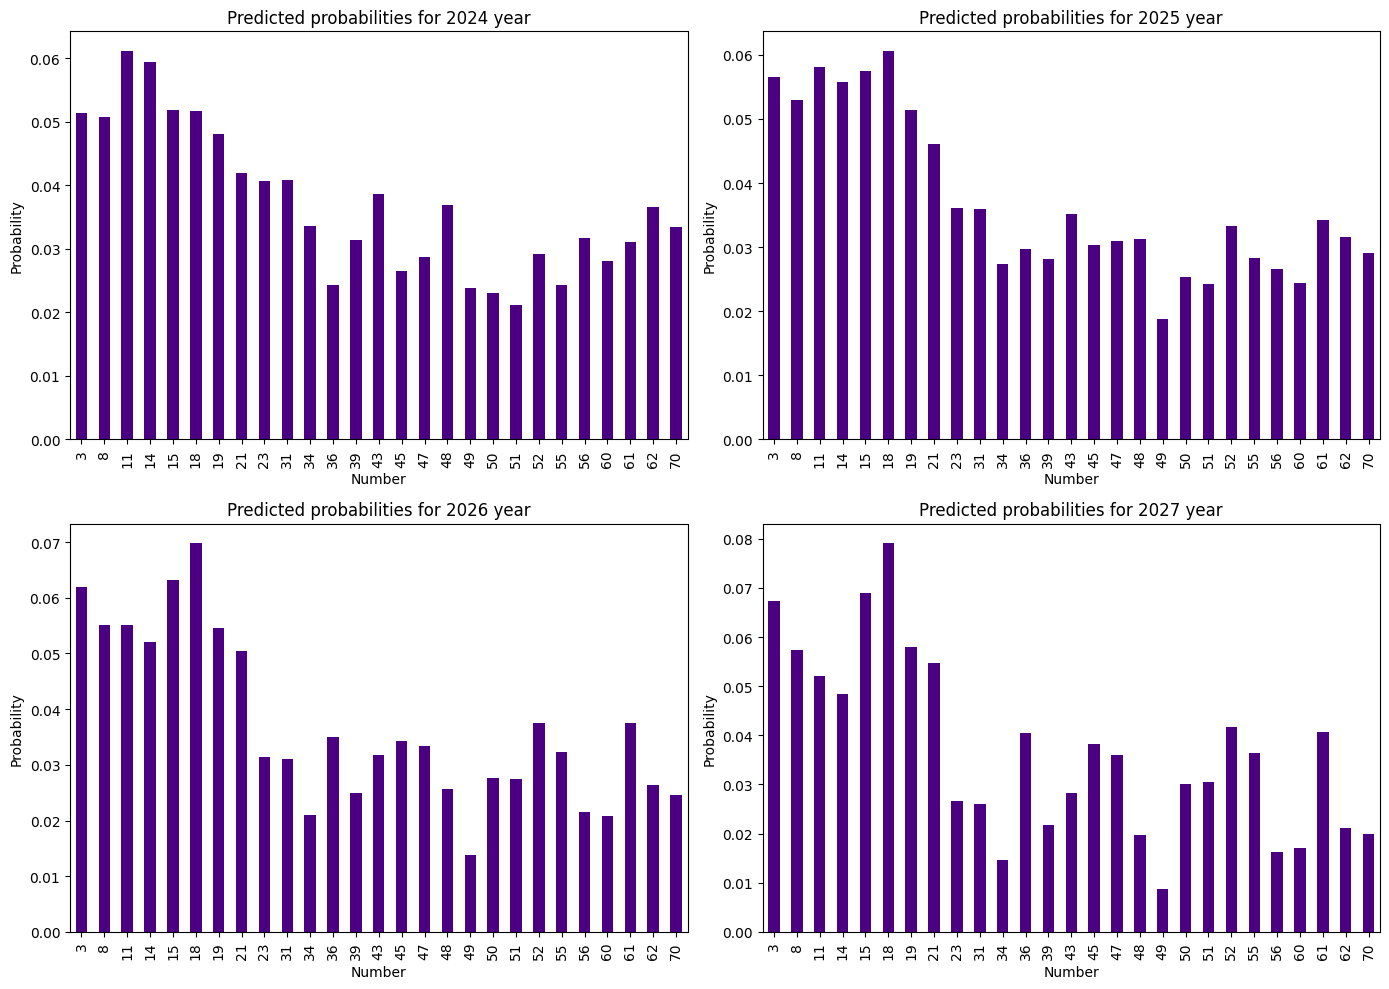

In [81]:
# Zu prognostizierende Jahre / Годы для прогноза
years = np.arange(2023, 2028)
# Konvertieren eines Wörterbuchs in einen DataFrame mit den richtigen Spalten / Преобразование словаря в DataFrame с правильными столбцами
trends_df70n = pd.DataFrame.from_dict(trends, orient='index', columns=['Intercept', 'Slope', 'P-value'])
# Bestimmung des Schwellenwerts  p < 0,3 / Определение порога для p-значений  p < 0.3
significant_numbers = trends_df70n[trends_df70n['P-value'] < 0.3]
predicted_frequencies = {}
for index, row in significant_numbers.iterrows():
    predicted_frequencies[index] = row['Intercept'] + row['Slope'] * (years - 2022)
predicted_df70n = pd.DataFrame(predicted_frequencies, index=years)
# Normalisierende Werte / Нормализация значений
probability_df70n = predicted_df70n.div(predicted_df70n.sum(axis=1), axis=0)
print(probability_df70n)
# Visualisirung / Визуализация
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

for i, year in enumerate([2024, 2025, 2026, 2027]):
    row = i // 2
    col = i % 2
    probability_df70n.loc[year].plot(kind='bar', ax=axs[row, col], color='indigo')
    axs[row, col].set_title(f'Predicted probabilities for {year} year')
    axs[row, col].set_xlabel('Number')
    axs[row, col].set_ylabel('Probability')

plt.tight_layout()
plt.show()

In [82]:
# Zahlen mit deutlich positiven Trends und niedrigen p-Werten / Номера с значительными положительными трендами и низкими p-value
selected_numbers_df70n = trends_df70n[(trends_df70n['P-value'] < 0.3) & (trends_df70n['Slope'] > 0)]
print("Selected Numbers with Positive Trends and Low P-Values", selected_numbers_df70n.index.tolist())

Selected Numbers with Positive Trends and Low P-Values [3, 8, 15, 18, 19, 21, 36, 45, 47, 50, 51, 52, 55, 61]


In [83]:
megaball_heatmap_df70n = megaball_heatmap_df70n.T

trendsMB = {}
for column in megaball_heatmap_df70n.columns:
    # Prüfen, ob eine Spalte numerisch ist / Проверяем, является ли столбец числовым
    if pd.api.types.is_numeric_dtype(megaball_heatmap_df70n[column]):
        # Добавляем константу для модели
        X = sm.add_constant(np.arange(len(megaball_heatmap_df70n)))  # Zeit / Время
        y = megaball_heatmap_df70n[column].astype(float).values  # Häufigkeit des Vorkommens der Zahl / Частота появления номера
        model = sm.OLS(y, X)
        results = model.fit()
        # Speichern die Ergebnisse für jede Zahl / Сохраняем результаты для каждого номера
        trendsMB[column] = {'Slope': results.params[1], 'Intercept': results.params[0], 'P-value': results.pvalues[1]}

# Konvertieren eines Wörterbuchs in einen DataFrame zur Analyse / Преобразуем словарь в DataFrame для удобства анализа
trendsMB_df70n = pd.DataFrame(trendsMB).T

# Legen Sie Optionen fest, um alle Zeilen anzuzeigen / Установка параметров для отображения всех строк
pd.set_option('display.max_rows', None)
print(trendsMB_df70n)

           Slope  Intercept   P-value
25  6.571429e-01   3.190476  0.145357
24  8.857143e-01   2.619048  0.110059
23 -8.285714e-01   5.238095  0.203307
22 -8.571429e-02   6.047619  0.795537
21  1.714286e-01   3.571429  0.716026
20 -4.857143e-01   5.380952  0.400611
19 -7.771561e-16   4.333333  1.000000
18  1.085714e+00   2.619048  0.024714
17  1.142857e-01   4.380952  0.817770
16 -4.285714e-01   4.238095  0.132538
15  5.428571e-01   2.476190  0.384533
14 -3.142857e-01   4.952381  0.309184
13  3.428571e-01   4.142857  0.222068
12  4.571429e-01   3.190476  0.286240
11 -5.714286e-02   5.809524  0.882870
10 -9.142857e-01   6.619048  0.134583
9  -5.142857e-01   5.952381  0.218484
8   2.571429e-01   2.190476  0.591941
7   5.714286e-02   3.190476  0.893668
6  -3.714286e-01   4.428571  0.438739
5  -4.571429e-01   4.142857  0.002838
4   8.571429e-02   4.619048  0.860752
3   1.428571e-01   2.809524  0.489823
2  -1.142857e-01   3.619048  0.788411
1  -2.857143e-01   4.714286  0.326164


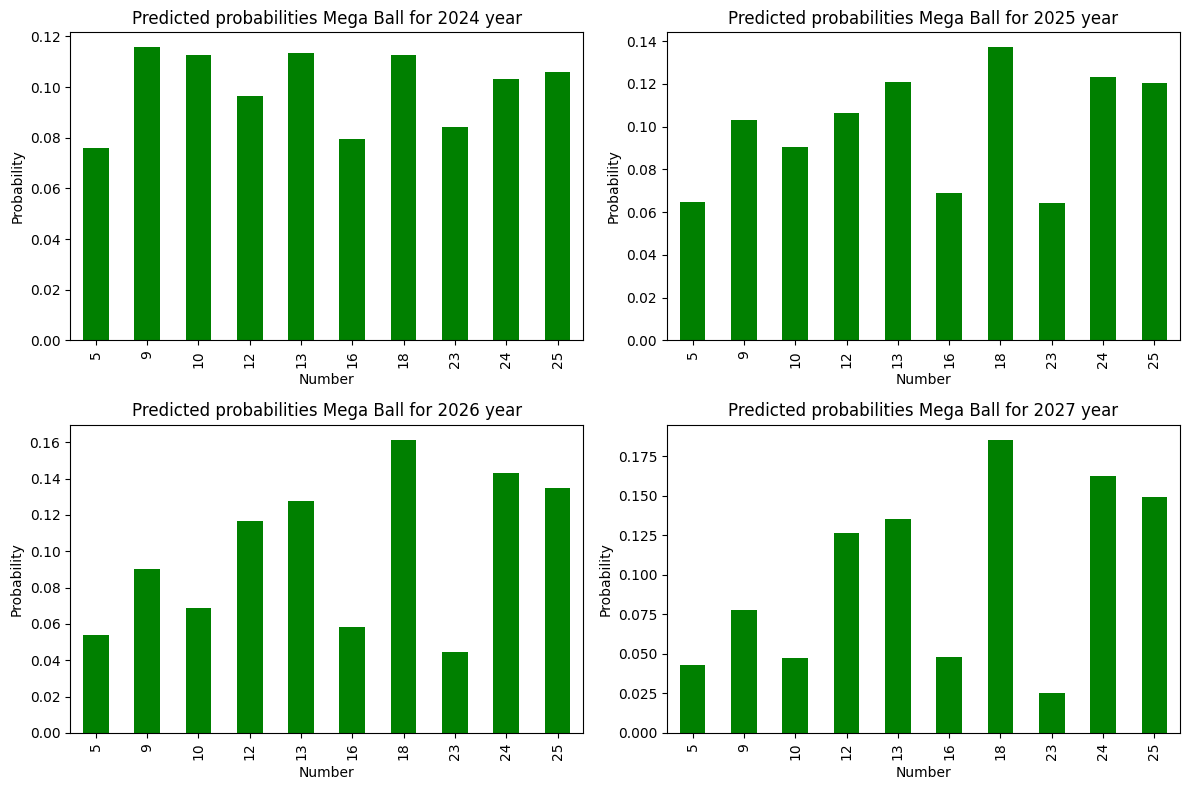

In [84]:
# Zu prognostizierende Jahre / Годы для прогноза
years = np.arange(2023, 2028)
# Konvertieren eines Wörterbuchs in einen DataFrame mit den richtigen Spalten / Преобразование словаря в DataFrame с правильными столбцами
trendsMB_df70n = pd.DataFrame.from_dict(trendsMB, orient='index', columns=['Intercept', 'Slope', 'P-value'])
# Bestimmung des Schwellenwerts  p < 0,3 / Определение порога для p-значений  p < 0.3
significant_numbersMB = trendsMB_df70n[trendsMB_df70n['P-value'] < 0.3]
predicted_frequenciesMB = {}
for index, row in significant_numbersMB.iterrows():
    predicted_frequenciesMB[index] = row['Intercept'] + row['Slope'] * (years - 2022)
predictedMB_df70n = pd.DataFrame(predicted_frequenciesMB, index=years)
probabilityMB_df70n = predictedMB_df70n.div(predictedMB_df70n.sum(axis=1), axis=0)
probabilityMB_df70n = probabilityMB_df70n.sort_index(axis=1)

# Visualisirung / Визуализация
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
for i, year in enumerate([2024, 2025, 2026, 2027]):
    row = i // 2
    col = i % 2
    probabilityMB_df70n.loc[year].plot(kind='bar', ax=axs[row, col], color='green')
    axs[row, col].set_title(f'Predicted probabilities Mega Ball for {year} year')
    axs[row, col].set_xlabel('Number')
    axs[row, col].set_ylabel('Probability')

plt.tight_layout()
plt.show()

In [85]:
# Zahlen mit deutlich positiven Trends und niedrigen p-Werten / Номера с значительными положительными трендами и низкими p-value
selected_numbersMB_df70n = trendsMB_df70n[(trendsMB_df70n['P-value'] < 0.3) & (trendsMB_df70n['Slope'] > 0)]
print("Selected Mega Balls with Positive Trends and Low P-Values", selected_numbersMB_df70n.index.tolist())

Selected Mega Balls with Positive Trends and Low P-Values [25, 24, 18, 13, 12]


**Entwicklung eines polynomialen Regressionsmodells**

Die polynomiale Regression ist eine Methode der Regressionsanalyse, die verwendet wird, um Beziehungen zwischen einer abhängigen Variablen und einer oder mehreren unabhängigen Variablen zu modellieren, indem die unabhängigen Variablen auf verschiedene Grade (Polynomgrade) erhöht werden. In unserem Fall ist die abhängige Variable die Häufigkeit des Auftretens von Lotteriezahlen, die wir vorhersagen möchten. Die unabhängigen Variablen sind die Jahre, für die wir Daten haben (2018-2022). Diese Variablen werden verwendet, um die Häufigkeit des Auftretens von Zahlen in der Zukunft vorherzusagen. Bei der polynomialen Regression modellieren wir die Abhängigkeit der Häufigkeit des Auftretens von Zahlen (abhängige Variable) von der Zeit (unabhängige Variablen), wobei die Jahre in verschiedene Grade erhoben werden, um polynomiale Merkmale zu erzeugen. Im Gegensatz zur linearen Regression kann die polynomiale Regression nichtlineare Beziehungen in den Daten erfassen, was sie nützlich für die Vorhersage komplexer Trends macht.

Schritte zur Entwicklung des Modells:

- **Definition signifikanter Zahlen:** Basierend auf der Trendanalyse werden Zahlen mit einem p-Wert von weniger als 0,3 ausgewählt. Dies ermöglicht es, sich auf Zahlen zu konzentrieren, die einen statistisch signifikanten Einfluss haben.
- **Skalierung der Daten:** Die Daten werden im Bereich von 0 bis 1 normalisiert, um die Korrektheit des Modells zu gewährleisten und die Genauigkeit der Vorhersagen zu verbessern.
- **Datenvorbereitung für die polynomiale Regression:**
  - Daten aus den Jahren 2018-2022 werden verwendet, um das Modell zu trainieren.
  - Das Jahr 2023 wird verwendet, um das Modell zu testen.
  - Prognosen werden für die Jahre 2023-2027 erstellt.
- **Erstellung und Training des Modells:**
  - Für jede signifikante Zahl werden polynomiale Merkmale erstellt.
  - Das Modell wird mit den Daten von 2018-2022 trainiert.
  - Werte für das Testjahr (2023) sowie für zukünftige Jahre (2024-2027) werden prognostiziert.
- **Transformation und Wiederherstellung der Daten-Skalen:** Die Ergebnisse werden in ein DataFrame umgewandelt und die Daten-Skalen werden zur Interpretation der Ergebnisse wiederhergestellt.
- **Verifikation und Extraktion von Daten für signifikante Zahlen:**
  - Sicherstellen, dass Indizes und Spalten im richtigen Format vorliegen.
  - Überprüfen, welche Zahlen in beiden DataFrames vorhanden sind.
  - Extraktion von Daten für signifikante Zahlen.

**Разработка модели полиномиальной регрессии**
Полиномиальная регрессия является методом регрессионного анализа, который используется для моделирования отношений между зависимой переменной и одной или несколькими независимыми переменными, поднимая независимые переменные в различные степени (степень полинома). В нашем случае зависимая переменная это частота выпадения номеров лотереи. Это переменная, которую мы хотим предсказать. Независимые переменные: годы, за которые у нас есть данные (2018-2022). Это переменные, которые используются для предсказания частоты выпадения номеров в будущем. В полиномиальной регрессии мы моделируем зависимость частоты выпадения номеров (зависимая переменная) от времени (независимые переменные), при этом годы поднимаются в различные степени для создания полиномиальных признаков.В отличие от линейной регрессии, полиномиальная регрессия может улавливать нелинейные отношения в данных, что делает её полезной для прогнозирования сложных трендов.

Шаги разработки модели:
- **Определение значимых номеров:** На основе анализа трендов выбираются номера с p-значением менее 0.3. Это позволяет сосредоточиться на номерах, которые имеют статистически значимое влияние.
- **Масштабирование данных:** Данные нормализуются в диапазоне от 0 до 1 для обеспечения корректности модели и улучшения точности предсказаний.
- **Подготовка данных для полиномиальной регрессии:**
  - Данные за годы 2018-2022 используются для обучения модели.
  - 2023 год используется для тестирования модели.
  - Прогнозы делаются на 2023-2027 годы.
- **Создание и обучение модели:**
  - Для каждого значимого номера создаются полиномиальные признаки.
  - Модель обучается на данных за 2018-2022 годы.
  - Прогнозируется значение для тестового года (2023), а также для будущих лет (2024-2027).
- **Преобразование и восстановление масштабов данных:** Результаты преобразуются в DataFrame и восстанавливаются масштабы данных для интерпретации результатов.
- **Верификация и извлечение данных для значимых номеров:**
  - Убедимся, что индексы и столбцы в правильном формате.
  - Проверим, какие номера присутствуют в обоих DataFrame.
  - Извлечение данных для значимых номеров.

       Poly MAE  Poly RMSE     Poly R²  Trend MAE  Trend RMSE  Trend R²
2023  54.192593  68.385357 -107.610096   8.194366     9.95482 -1.301499


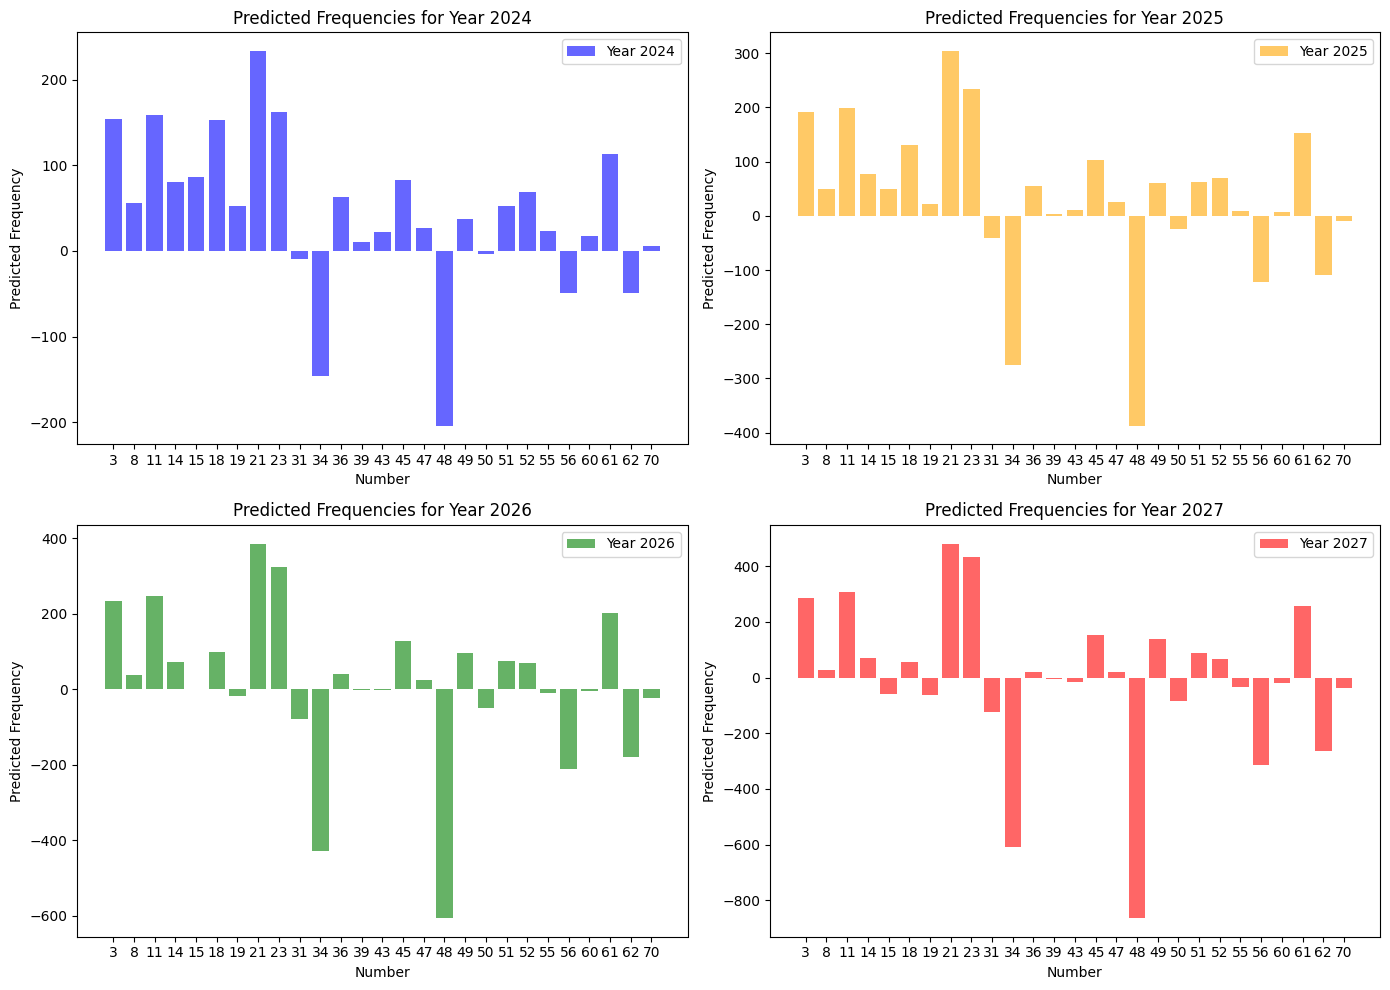

In [86]:
# Definition signifikanter Zahlen / Определение значимых номеров
significant_numbers = trends_df70n[trends_df70n['P-value'] < 0.3].index.tolist()
# Konvertieren signifikante Zahlen zum Vergleich mit Spalten in Zeilen / Преобразуем значимые номера в строки для сравнения с колонками
significant_numbers_str = list(map(str, significant_numbers))

# Skalierung der Daten / Масштабирование данные
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(heatmap_df70n)

# Datenvorbereitung für die polynomiale Regression / Подготовка данных для полиномиальной регрессии
years = np.array(heatmap_df70n.index).reshape(-1, 1)
train_years = np.array([2018, 2019, 2020, 2021, 2022]).reshape(-1, 1)  # Jahren zu trainieren / Годы для обучения
test_year = np.array([2023]).reshape(-1, 1)  # Jahren zutestieren / Год для тестирования
future_years = np.array([2023, 2024, 2025, 2026, 2027]).reshape(-1, 1)  # Jahren zu prognosieren / Годы для прогнозирования

# Erstellung und Training des Modells / Создание и обучение модели
predictions = {}
degree = 2 # Polynomgrad / Степень полинома

for column in heatmap_df70n.columns:
    # Polynomfunktionen erstellen / Создаем полиномиальные признаки
    poly = PolynomialFeatures(degree)
    train_years_poly = poly.fit_transform(train_years)
    test_year_poly = poly.transform(test_year)
    future_years_poly = poly.transform(future_years)

    # Trainieren des Modells / Обучаем модель
    model = LinearRegression()
    model.fit(train_years_poly, heatmap_df70n.loc[train_years.flatten(), column])

    # Vorhersage des Werts für das Testjahr / Прогнозируем значение для тестового года
    test_predict = model.predict(test_year_poly)
    heatmap_df70n.loc[2023, column] = test_predict[0]

    # Die Zukunft voraussagen / Прогнозируем будущее
    future_predict = model.predict(future_years_poly)
    predictions[column] = future_predict

# Konvertieren der Ergebnisse in einen DataFrame / Преобразуем результаты в DataFrame
poly_predictions = pd.DataFrame(predictions, index=[2023, 2024, 2025, 2026, 2027])
# Wiederherstellung der Daten Skala / Восстанавливаем масштаб данных
poly_predictions = scaler.inverse_transform(poly_predictions)
poly_predictions = pd.DataFrame(poly_predictions, columns=heatmap_df70n.columns, index=[2023, 2024, 2025, 2026, 2027])
# Stellen sicher, dass Indizes und Spalten das richtige Format haben / Убедимся, что индексы и столбцы в правильном формате
probability_df70n.columns = probability_df70n.columns.astype(str)
poly_predictions.columns = poly_predictions.columns.astype(str)
heatmap_df70n.columns = heatmap_df70n.columns.astype(str)
# Prüfen, welche Zahlen in beiden DataFrames vorhanden sind / Проверим, какие номера присутствуют в обоих DataFrame
available_trend_numbers = [num for num in significant_numbers_str if num in probability_df70n.columns]
available_poly_numbers = [num for num in significant_numbers_str if num in poly_predictions.columns]
# Wenn keine Nummern verfügbar sind, drucken Sie eine entsprechende Meldung aus und stoppen Sie die Ausführung  / Если нет доступных номеров, напечатаем соответствующее сообщение и остановим выполнение
if not available_trend_numbers or not available_poly_numbers:
    print("No available trend or poly numbers found.")
else:
    # Extrahieren von Daten für signifikante Zahlen / Извлечение данных для значимых номеров
    trend_predictions_significant = probability_df70n.loc[:, available_trend_numbers]
    poly_predictions_significant = poly_predictions.loc[:, available_poly_numbers]

    # Vorbereiten von Daten für Genauigkeitsmetriken / Подготовка данных для метрик точности
    metrics = {}
    for year in [2023]:
        y_true = heatmap_df70n.loc[year, significant_numbers_str].astype(float)

        y_pred_trend = trend_predictions_significant.loc[int(year)].astype(float)
        trend_rmse = np.sqrt(mean_squared_error(y_true, y_pred_trend))
        trend_mae = mean_absolute_error(y_true, y_pred_trend)
        trend_r2 = r2_score(y_true, y_pred_trend)

        y_pred_poly = poly_predictions_significant.loc[int(year), significant_numbers_str].astype(float)
        poly_rmse = np.sqrt(mean_squared_error(y_true, y_pred_poly))
        poly_mae = mean_absolute_error(y_true, y_pred_poly)
        poly_r2 = r2_score(y_true, y_pred_poly)

        metrics[year] = {
            'Trend RMSE': trend_rmse,
            'Trend MAE': trend_mae,
            'Trend R²': trend_r2,
            'Poly RMSE': poly_rmse,
            'Poly MAE': poly_mae,
            'Poly R²': poly_r2
        }

    # Konvertieren die Ergebnisse in einen DataFrame / Преобразуем результаты в DataFrame для удобства
    metrics_df = pd.DataFrame(metrics).T
    print(metrics_df)

# Visualisierung / Визуализация
fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # Erstellen von 2x2-Untergraphen / Создаем подграфики 2x2
colors = ['blue', 'orange', 'green', 'red']  # Farben für verschiedene Jahre / Цвета для разных лет

for i, year in enumerate([2024, 2025, 2026, 2027]):
    row = i // 2
    col = i % 2
    axs[row, col].bar(significant_numbers_str, poly_predictions.loc[year, significant_numbers_str], color=colors[i], alpha=0.6, label=f'Year {year}')
    axs[row, col].set_title(f'Predicted Frequencies for Year {year}')
    axs[row, col].set_xlabel('Number')
    axs[row, col].set_ylabel('Predicted Frequency')
    axs[row, col].legend()

plt.tight_layout()
plt.show()

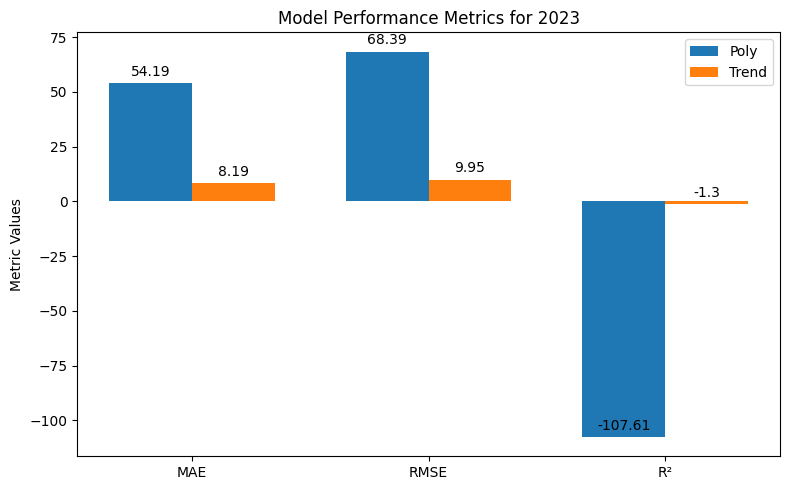

In [87]:
metrics_df = pd.DataFrame(metrics_df)
# Daten für die Visualisierung vorbereiten / Подготовка данных для визуализации
metrics = ['MAE', 'RMSE', 'R²']
poly_metrics = [metrics_df['Poly MAE'].values[0], metrics_df['Poly RMSE'].values[0], metrics_df['Poly R²'].values[0]]
trend_metrics = [metrics_df['Trend MAE'].values[0], metrics_df['Trend RMSE'].values[0], metrics_df['Trend R²'].values[0]]

x = np.arange(len(metrics))
width = 0.35
fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.bar(x - width/2, poly_metrics, width, label='Poly')
rects2 = ax.bar(x + width/2, trend_metrics, width, label='Trend')

# Hinzufügen von Beschriftungen und Titeln / Подготовка данных для визуализации
ax.set_ylabel('Metric Values')
ax.set_title('Model Performance Metrics for 2023')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
# Datenspaltenbeschriftungen / Подписи столбцов с данными
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 Punkte vertikaler Versatz / Вертикальное смещение на 3 точки
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

      Poly MAE  Poly RMSE     Poly R²  Trend MAE  Trend RMSE  Trend R²
2023     22.44   27.20794 -100.663371       5.18    5.843983 -3.690196


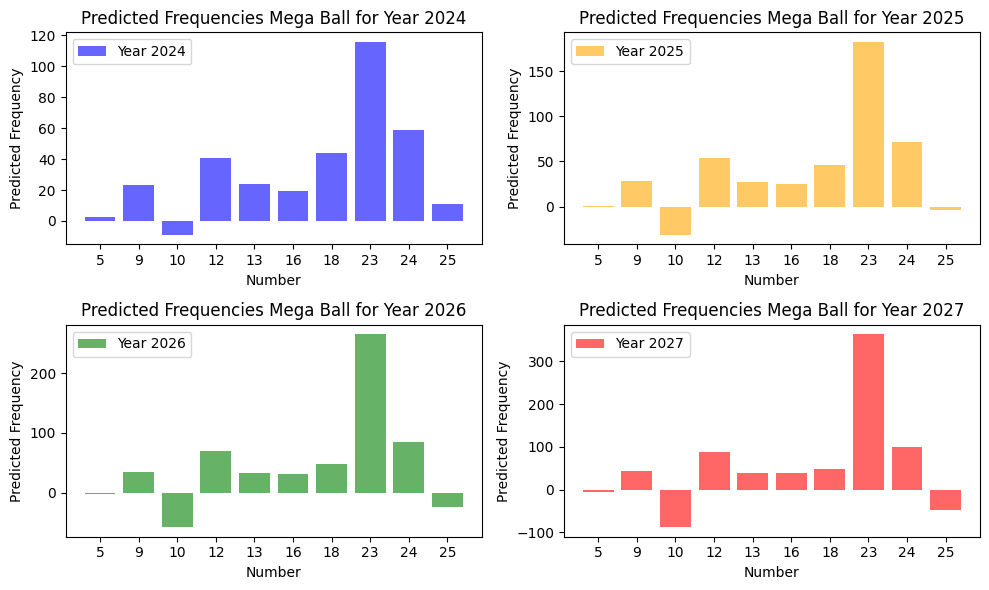

In [88]:
# Definition signifikanter Zahlen / Определение значимых номеров
significant_numbersMB = trendsMB_df70n[trendsMB_df70n['P-value'] < 0.3].index.tolist()
# Konvertieren signifikante Zahlen zum Vergleich mit Spalten in Zeilen / Преобразуем значимые номера в строки для сравнения с колонками
significant_numbersMB_str = list(map(str, significant_numbersMB))

# Skalierung der Daten / Масштабирование данные
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_dataMB = scaler.fit_transform(megaball_heatmap_df70n)

# Datenvorbereitung für die polynomiale Regression / Подготовка данных для полиномиальной регрессии
years = np.array(megaball_heatmap_df70n.index).reshape(-1, 1)
train_years = np.array([2018, 2019, 2020, 2021, 2022]).reshape(-1, 1)  # Jahren zu trainieren / Годы для обучения
test_year = np.array([2023]).reshape(-1, 1)   # Jahren zutestieren / Год для тестирования
future_years = np.array([2023, 2024, 2025, 2026, 2027]).reshape(-1, 1)  # Jahren zu prognosieren / Годы для прогнозирования

# Erstellung und Training des Modells / Создание и обучение модели
predictions = {}
degree = 2  # Polynomgrad / Степень полинома

for column in megaball_heatmap_df70n.columns:
    # Polynomfunktionen erstellen / Создаем полиномиальные признаки
    poly = PolynomialFeatures(degree)
    train_years_poly = poly.fit_transform(train_years)
    test_year_poly = poly.transform(test_year)
    future_years_poly = poly.transform(future_years)

    # Trainieren des Modells / Обучаем модель
    model = LinearRegression()
    model.fit(train_years_poly, megaball_heatmap_df70n.loc[train_years.flatten(), column])

    # Vorhersage des Werts für das Testjahr / Прогнозируем значение для тестового года
    test_predict = model.predict(test_year_poly)
    megaball_heatmap_df70n.loc[2023, column] = test_predict[0]

    # Die Zukunft voraussagen / Прогнозируем будущее
    future_predict = model.predict(future_years_poly)
    predictions[column] = future_predict

# Konvertieren der Ergebnisse in einen DataFrame / Преобразуем результаты в DataFrame
poly_predictionsMB = pd.DataFrame(predictions, index=[2023, 2024, 2025, 2026, 2027])
# Wiederherstellung der Daten Skala / Восстанавливаем масштаб данных
poly_predictionsMB = scaler.inverse_transform(poly_predictionsMB)
poly_predictionsMB = pd.DataFrame(poly_predictionsMB, columns=megaball_heatmap_df70n.columns, index=[2023, 2024, 2025, 2026, 2027])
# Stellen sicher, dass Indizes und Spalten das richtige Format haben / Убедимся, что индексы и столбцы в правильном формате
probabilityMB_df70n.columns = probabilityMB_df70n.columns.astype(str)
poly_predictionsMB.columns = poly_predictionsMB.columns.astype(str)
megaball_heatmap_df70n.columns = megaball_heatmap_df70n.columns.astype(str)
# Prüfen, welche Zahlen in beiden DataFrames vorhanden sind / Проверим, какие номера присутствуют в обоих DataFrame
available_trend_numbersMB = [num for num in significant_numbersMB_str if num in probabilityMB_df70n.columns]
available_poly_numbersMB = [num for num in significant_numbersMB_str if num in poly_predictionsMB.columns]
# Filtern Sie signifikante_ZahlenMB_str, um nur die Zahlen zu belassen, die in beiden DataFrames enthalten sind / Фильтруем significant_numbersMB_str, чтобы оставить только те номера, которые есть в обоих DataFrame
common_numbersMB_str = [num for num in significant_numbersMB_str if num in available_trend_numbersMB and num in available_poly_numbersMB]
# Sortieren die Zahlen / Сортируем номера
common_numbersMB_str = sorted(common_numbersMB_str, key=int)

# Wenn keine Nummern verfügbar sind, drucken Sie eine entsprechende Meldung aus und stoppen Sie die Ausführung  / Если нет доступных номеров, напечатаем соответствующее сообщение и остановим выполнение
if not common_numbersMB_str:
    print("No available trend or poly numbers found.")
else:
    # Extrahieren von Daten für signifikante Zahlen / Извлечение данных для значимых номеров
    trend_predictions_significantMB = probabilityMB_df70n.loc[:, common_numbersMB_str]
    poly_predictions_significantMB = poly_predictionsMB.loc[:, common_numbersMB_str]

    # Vorbereiten von Daten für Genauigkeitsmetriken / Подготовка данных для метрик точности
    metrics = {}
    for year in [2023]:
        y_true = megaball_heatmap_df70n.loc[year, common_numbersMB_str].astype(float)

        y_pred_trend = trend_predictions_significantMB.loc[(year), common_numbersMB_str].astype(float)
        trend_rmse = np.sqrt(mean_squared_error(y_true, y_pred_trend))
        trend_mae = mean_absolute_error(y_true, y_pred_trend)
        trend_r2 = r2_score(y_true, y_pred_trend)

        y_pred_poly = poly_predictions_significantMB.loc[(year), common_numbersMB_str].astype(float)

        poly_rmse = np.sqrt(mean_squared_error(y_true, y_pred_poly))
        poly_mae = mean_absolute_error(y_true, y_pred_poly)
        poly_r2 = r2_score(y_true, y_pred_poly)

        metrics[year] = {
            'Trend RMSE': trend_rmse,
            'Trend MAE': trend_mae,
            'Trend R²': trend_r2,
            'Poly RMSE': poly_rmse,
            'Poly MAE': poly_mae,
            'Poly R²': poly_r2
        }

    # Konvertieren die Ergebnisse in einen DataFrame / Преобразуем результаты в DataFrame для удобства
    metrics_dfMB = pd.DataFrame(metrics).T
    print(metrics_dfMB)

# Visualisierung / Визуализация
fig, axs = plt.subplots(2, 2, figsize=(10, 6))  # Erstellen von 2x2-Untergraphen / Создаем подграфики 2x2
colors = ['blue', 'orange', 'green', 'red']  # Farben für verschiedene Jahre / Цвета для разных лет

for i, year in enumerate([2024, 2025, 2026, 2027]):
    row = i // 2
    col = i % 2
    axs[row, col].bar(common_numbersMB_str, poly_predictionsMB.loc[year, common_numbersMB_str], color=colors[i], alpha=0.6, label=f'Year {year}')
    axs[row, col].set_title(f'Predicted Frequencies Mega Ball for Year {year}')
    axs[row, col].set_xlabel('Number')
    axs[row, col].set_ylabel('Predicted Frequency')
    axs[row, col].legend()

plt.tight_layout()
plt.show()


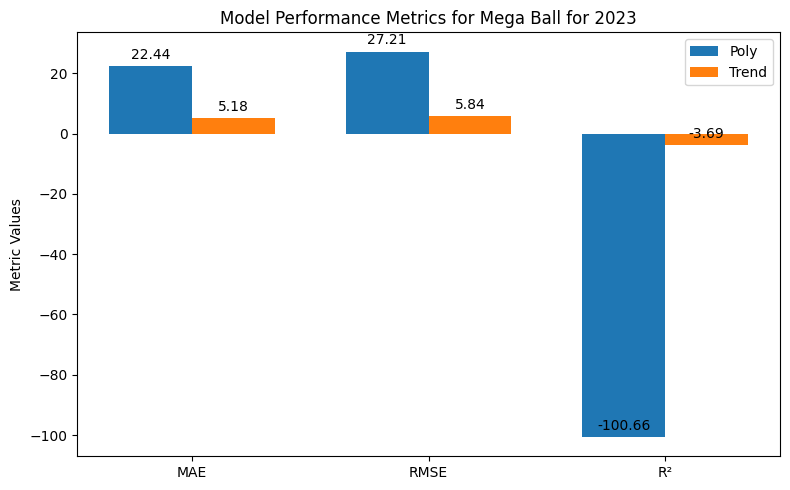

In [89]:
metrics_dfMB = pd.DataFrame(metrics_dfMB)
# Daten für die Visualisierung vorbereiten / Подготовка данных для визуализации
metrics = ['MAE', 'RMSE', 'R²']
poly_metricsMB = [metrics_dfMB['Poly MAE'].values[0], metrics_dfMB['Poly RMSE'].values[0], metrics_dfMB['Poly R²'].values[0]]
trend_metricsMB = [metrics_dfMB['Trend MAE'].values[0], metrics_dfMB['Trend RMSE'].values[0], metrics_dfMB['Trend R²'].values[0]]

x = np.arange(len(metrics))
width = 0.35
fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.bar(x - width/2, poly_metricsMB, width, label='Poly')
rects2 = ax.bar(x + width/2, trend_metricsMB, width, label='Trend')

# Hinzufügen von Beschriftungen und Titeln / Подготовка данных для визуализации
ax.set_ylabel('Metric Values')
ax.set_title('Model Performance Metrics for Mega Ball for 2023')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Подписи столбцов с данными
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 Punkte vertikaler Versatz / Вертикальное смещение на 3 точки
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

**Vergleich des polynomialen Regressionsmodells mit der Trendanalyse**

Сравнение модели полиномиальной регрессии с анализом трендов

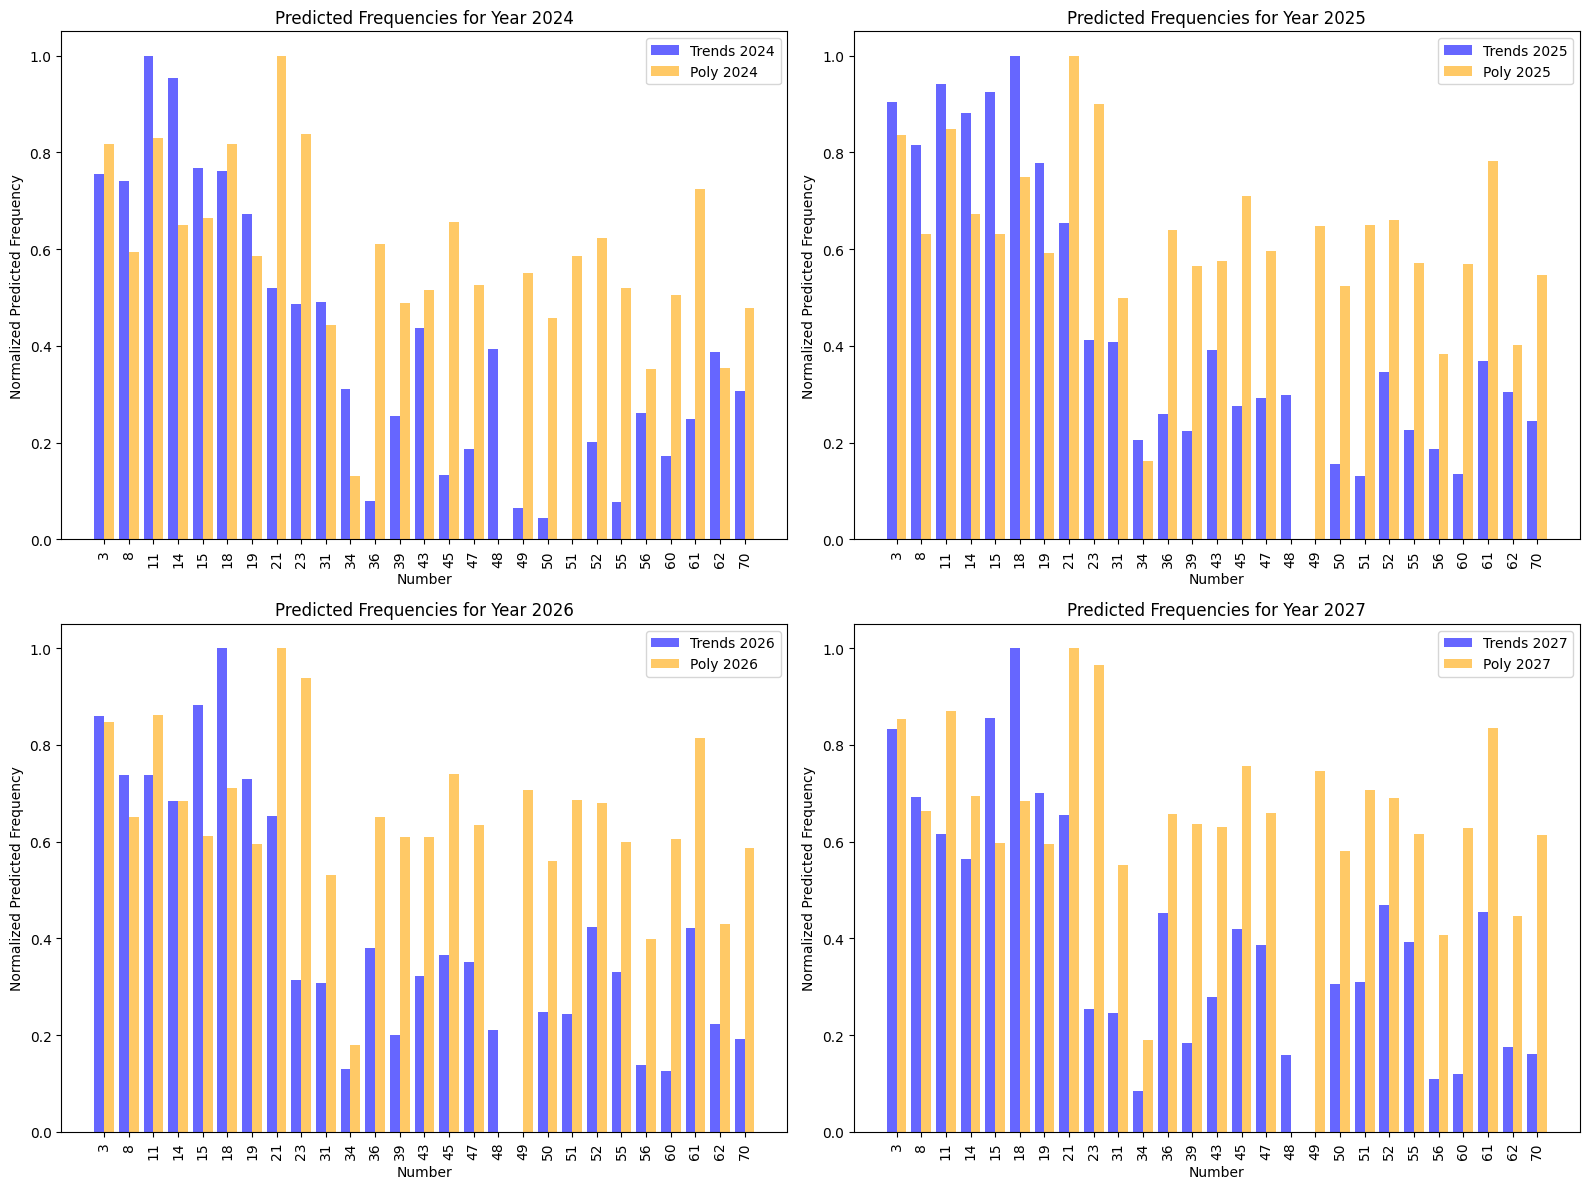

In [ ]:
# Definition signifikanter Zahlen / Определение значимых номеров
significant_numbers = trends_df70n[trends_df70n['P-value'] < 0.3].index
years = [2024, 2025, 2026, 2027]

# Normalisierung von Trenddaten und polynomiale Regression anhand von Zahlen / Нормализация данных трендов и полиномиальной регрессии по номерам
scaler = MinMaxScaler()
trends_data_transposed = probability_df70n.loc[years].T
poly_data_transposed = poly_predictions_significant.loc[years].T
trends_data_scaled = scaler.fit_transform(trends_data_transposed)
trends_data_scaled = pd.DataFrame(trends_data_scaled, index=trends_data_transposed.index, columns=trends_data_transposed.columns)

poly_data_scaled = scaler.fit_transform(poly_data_transposed)
poly_data_scaled = pd.DataFrame(poly_data_scaled, index=poly_data_transposed.index, columns=poly_data_transposed.columns)

# Visualisierung / Визуализация
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

for i, year in enumerate(years):
    row = i // 2
    col = i % 2
    indexes = np.arange(len(significant_numbers))

    ax1 = axs[row, col]
    ax1.bar(indexes - 0.2, trends_data_scaled[year].values, width=0.4, label=f'Trends {year}', color='blue', alpha=0.6)
    ax1.bar(indexes + 0.2, poly_data_scaled[year].values, width=0.4, label=f'Poly {year}', color='orange', alpha=0.6)

    ax1.set_xticks(indexes)
    ax1.set_xticklabels(significant_numbers, rotation=90)

    ax1.set_xlabel('Number')
    ax1.set_ylabel('Normalized Predicted Frequency')

    ax1.legend()
    ax1.set_title(f'Predicted Frequencies for Year {year}')

plt.tight_layout()
#plt.savefig(f'/content/PredictedProbabilitiesCompareTrendsPoly.png')
plt.show()


**Visualisierung von Häufigkeitsprognosen für alle MegaBall-Zahlen für 2024–2027 mittels polynomialer Regression**

Визуализация прогнозов частот для всех номеров MegaBall на 2024-2027 с использованием полиномиальной регрессии

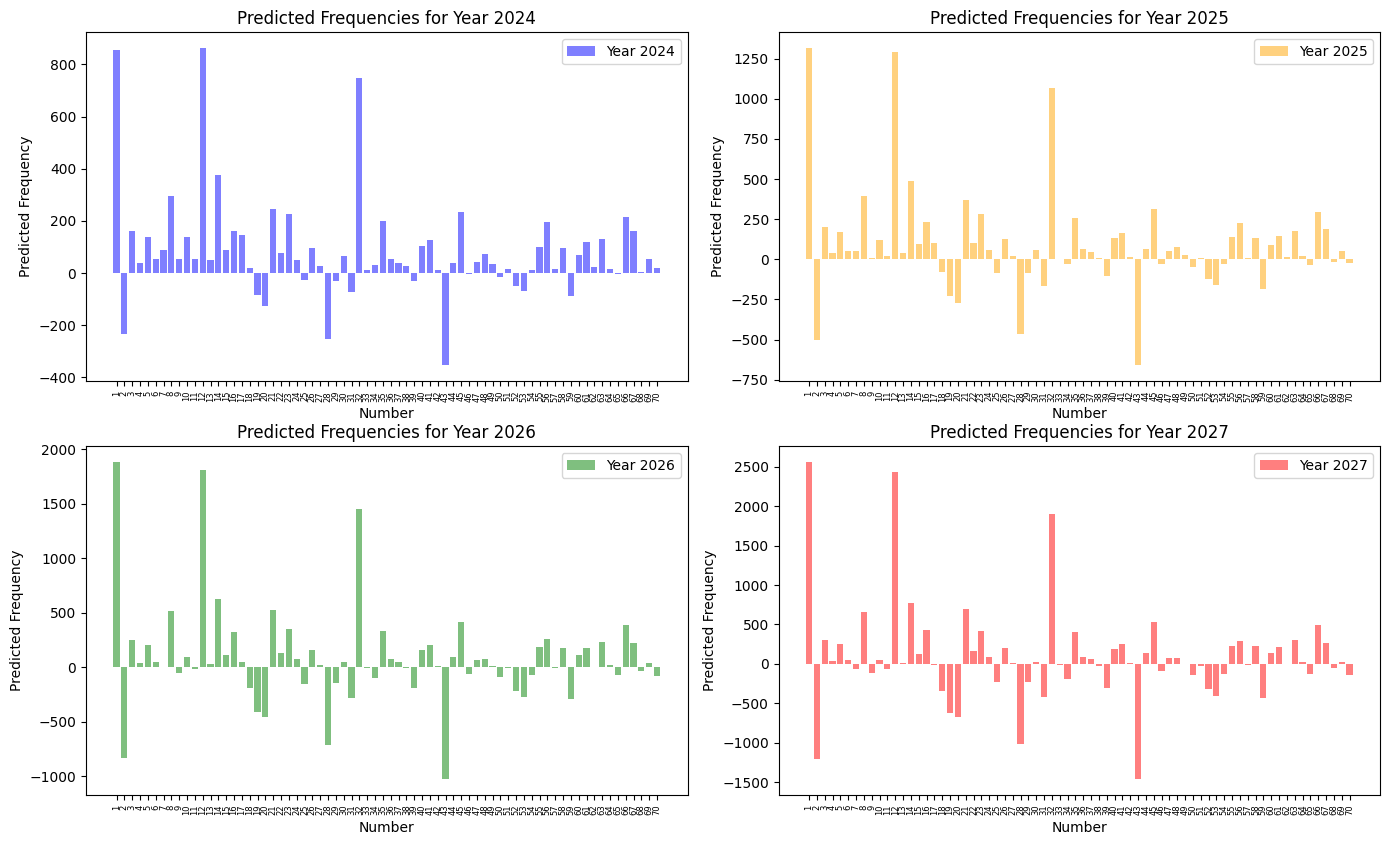

In [100]:
# Konvertieren von DataFrame in Langformat / Преобразуем DataFrame в длинный формат
heatmap_long = heatmap_df70n.reset_index().melt(id_vars=['Year'], var_name='Number', value_name='Frequency')
# Wir gruppieren die Daten nach Jahren und berechnen die Häufigkeiten der Zahlen / Группируем данные по годам и вычисляем частоты выпадения номеров
frequency_data = heatmap_long.pivot(index='Year', columns='Number', values='Frequency')
# Skalierung der Daten / Масштабируем данные
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(frequency_data)
# Vorbereiten von Daten für die Polynomregression / Подготовка данных для полиномиальной регрессии
years = np.array(frequency_data.index).reshape(-1, 1)
future_years = np.array([2024, 2025, 2026, 2027]).reshape(-1, 1)

# Vorhersage für jede Zahl / Прогнозирование для каждого номера
predictions = {}
degree = 2  # Polynomgrad / Степень полинома
for column in frequency_data.columns:
    # Polynomfunktionen erstellen / Создаем полиномиальные признаки
    poly = PolynomialFeatures(degree)
    years_poly = poly.fit_transform(years)
    future_years_poly = poly.transform(future_years)

    # Trainieren des Modells / Обучаем модель
    model = LinearRegression()
    model.fit(years_poly, frequency_data[column])

    # Die Zukunft voraussagen / Прогнозируем будущее
    future_predict = model.predict(future_years_poly)
    predictions[column] = future_predict

# Konvertieren der Ergebnisse in einen DataFrame / Преобразуем результаты в DataFrame
poly_predictions = pd.DataFrame(predictions, index=[2024, 2025, 2026, 2027])
# Wiederherstellung der Datenskala / Восстанавливаем масштаб данных
poly_predictions = scaler.inverse_transform(poly_predictions)
# Erstellen einen DataFrame mit vorhergesagten Werten / Создаем DataFrame с предсказанными значениями
poly_predictions_df = pd.DataFrame(poly_predictions, columns=frequency_data.columns, index=[2024, 2025, 2026, 2027])

# Spalten in aufsteigender Reihenfolge sortieren / Сортируем столбцы по возрастанию
sorted_columns = sorted(frequency_data.columns, key=lambda x: int(x))
frequency_data = frequency_data[sorted_columns]
poly_predictions_df = poly_predictions_df[sorted_columns]

# Visualisierung / Визуализация
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
colors = ['blue', 'orange', 'green', 'red']

for i, year in enumerate([2024, 2025, 2026, 2027]):
    row = i // 2
    col = i % 2
    axs[row, col].bar(frequency_data.columns, poly_predictions[i], color=colors[i], alpha=0.5, label=f'Year {year}')
    axs[row, col].set_title(f'Predicted Frequencies for Year {year}')
    axs[row, col].set_xlabel('Number')
    axs[row, col].set_ylabel('Predicted Frequency')
    axs[row, col].legend()
    axs[row, col].tick_params(axis='x', rotation=90, labelsize=6)

plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
#plt.savefig(f'/content/PolyPredictedFrequencies.png')
plt.show()
